# Paper Figures

In [1]:
#IMPORT NEEDED LIBRARIES
import seaborn as sns
import xarray as xr
import numpy as np
import pandas as pd
import os
from pyrealm import pmodel
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import statsmodels.api as sm
from matplotlib.dates import date2num
#import requests
import tempfile
import fsspec
%matplotlib inline
import warnings
warnings.simplefilter("ignore") 
#import hvplot.xarray
#import geoviews as gv
#import holoviews as hv
import openpyxl

# Make the Area Abundance Figure

In [ ]:
cd path_to/veg_area

In [6]:
#Load the data
aces = pd.read_csv('aces_Area_1850_2014.csv')
caes = pd.read_csv('caes_Area_1850_2014.csv')
cesm = pd.read_csv('cesm_Area_1850_2014.csv')
cewa = pd.read_csv('cewa_Area_1850_2014.csv')
cmcs = pd.read_csv('cmcs_Area_1850_2014.csv')
cmes = pd.read_csv('cmes_Area_1850_2014.csv')
cncm = pd.read_csv('cncm_Area_1850_2014.csv')
cnes = pd.read_csv('cnes_Area_1850_2014.csv')
mpel = pd.read_csv('mpel_Area_1850_2014.csv')
mpeh = pd.read_csv('mpeh_Area_1850_2014.csv')
ukes = pd.read_csv('ukes_Area_1850_2014.csv')

In [4]:
luh2 = pd.read_csv('luh2_C3C4_Crop_Abundace_1850-2014.csv')

In [253]:
# Prepare the LUH2 C3 crop data
luhC3_1850 = luh2['luh2_c3crp_Abun'][0]/10**12
luhC3_2014 = luh2['luh2_c3crp_Abun'][164]/10**12
luhC3_change = luhC3_2014-luhC3_1850
luhC3_change_percent = (luhC3_change/luhC3_1850)*100

print('luhC3_1850 =', luhC3_1850)
print('luhC3_2014 =', luhC3_2014)
print('luhC3_change =', luhC3_change)
print('luhC3_change_percent =', luhC3_change_percent)

luhC3_1850 = 4.4329453504226475
luhC3_2014 = 12.748447528081385
luhC3_change = 8.315502177658738
luhC3_change_percent = 187.58413470777208


In [254]:
# Prepare the LUH2 C4 crop data
luhC4_1850 = luh2['luh2_c4crp_Abun'][0]/10**12
luhC4_2014 = luh2['luh2_c4crp_Abun'][164]/10**12
luhC4_change = luhC4_2014-luhC4_1850
luhC4_change_percent = (luhC4_change/luhC4_1850)*100

print('luhC4_1850 =', luhC4_1850)
print('luhC4_2014 =', luhC4_2014)
print('luhC4_change =', luhC4_change)
print('luhC4_change_percent =', luhC4_change_percent)

luhC4_1850 = 0.9446913114406855
luhC4_2014 = 3.3410432546379725
luhC4_change = 2.396351943197287
luhC4_change_percent = 253.66507706552005


In [289]:
luh_crp = luh2['luh2_c3crp_Abun'] + luh2['luh2_c4crp_Abun']

In [291]:
# Prepare the LUH2 crop data
luh_crp_1850 = luh_crp[0]/10**12
luh_crp_2014 = luh_crp[164]/10**12
luh_crp_change = luh_crp_2014-luh_crp_1850
luh_crp_change_percent = (luh_crp_change/luh_crp_1850)*100

print('luh_crp_1850 =', luh_crp_1850)
print('luh_crp_2014 =', luh_crp_2014)
print('luh_crp_change =', luh_crp_change)
print('luh_crp_change_percent =', luh_crp_change_percent)

luh_crp_1850 = 5.377636661863333
luh_crp_2014 = 16.08949078271936
luh_crp_change = 10.711854120856026
luh_crp_change_percent = 199.19259694172803


In [10]:
#Extract the area coverage for crops 
aces1 = aces['crpArea']
caes1 = caes['crpArea']
cesm1 = cesm['crpArea']
cewa1 = cewa['crpArea']
cmcs1 = cmcs['crpArea']
cmes1 = cmcs['crpArea']
cncm1 = cncm['crpArea']
cnes1 = cnes['crpArea']
mpeh1 = mpeh['crpArea']
mpel1 = mpel['crpArea']
ukes1 = ukes['crpArea']

#Stack them together
crp = np.vstack([aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                   cncm1, cnes1, mpeh1, mpel1, ukes1])

#Calculate the ensemble mean
crp_mean = (aces1 + caes1 + cesm1 + cewa1 + cmcs1 + cmes1 + 
            cncm1 + cnes1 + mpeh1 + mpel1 + ukes1)/11

In [12]:
upp_range = caes1.iloc[-1]/10e5 - crp_mean.iloc[-1]/10e5
low_range = ukes1.iloc[-1]/10e5 - crp_mean.iloc[-1]/10e5

mean = crp_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 14.284958803410026
Lower range: -4.0103826191291
Upper range: 1.4301824448979605


In [18]:
# Calculate the percentage ranges for crop
lowerRange = crp_mean[164] - ukes1[164]
upperRange = caes1[164] - crp_mean[164]

lowerRange_percentage = (lowerRange/crp_mean[164])*100
upperRange_percentage = (upperRange/crp_mean[164])*100

print('Crop lower percentage range =', lowerRange_percentage)
print('Crop upper percentage range =', upperRange_percentage)

Crop lower percentage range = 28.0741630012385
Crop upper percentage range = 10.01180657627487


In [304]:
crpMean_1850 = crp_mean[0]/10**6
crpMean_2014 = crp_mean[164]/10**6
crpMean_change = crpMean_2014-crpMean_1850
crpMean_change_percent = (crpMean_change/crpMean_1850)*100

print('crpMean_1850 =', crpMean_1850)
print('crpMean_2014 =', crpMean_2014)
print('crpMean_change =', crpMean_change)
print('crpMean_change_percent =', crpMean_change_percent)

crpMean_1850 = 5.976774633717184
crpMean_2014 = 14.284958803410026
crpMean_change = 8.308184169692842
crpMean_change_percent = 139.0078207537443


In [305]:
ukes1_1850 = ukes1[0]/10**6
ukes1_2014 = ukes1[164]/10**6
ukes1_change = ukes1_2014-ukes1_1850
ukes1_change_percent = (ukes1_change/ukes1_1850)*100

print('ukes1_1850 =', ukes1_1850)
print('ukes1_2014 =', ukes1_2014)
print('ukes1_change =', ukes1_change)
print('ukes1_change_percent =', ukes1_change_percent)

ukes1_1850 = 3.240202946292574
ukes1_2014 = 10.274576184280926
ukes1_change = 7.034373237988352
ukes1_change_percent = 217.09668667627903


In [13]:
#Extract the natural area coverage
aces2 = aces['totNatArea']
caes2 = caes['totNatArea']
cesm2 = cesm['totNatArea']
cewa2 = cewa['totNatArea']
cmcs2 = cmcs['totNatArea']
cmes2 = cmcs['totNatArea']
cncm2 = cncm['totNatArea']
cnes2 = cnes['totNatArea']
mpeh2 = mpeh['totNatArea']
mpel2 = mpel['totNatArea']
ukes2 = ukes['totNatArea']

#Stack them together
nat = np.vstack([aces2, caes2, cesm2, cewa2, cmcs2, cmes2, 
                   cncm2, cnes2, mpeh2, mpel2, ukes2])

#Calculate the ensemble mean
nat_mean = (aces2 + caes2 + cesm2 + cewa2 + cmcs2 + cmes2 + 
            cncm2 + cnes2 + mpeh2 + mpel2 + ukes2)/11

In [14]:
upp_range = cesm2.iloc[-1]/10e5 - nat_mean.iloc[-1]/10e5
low_range = caes2.iloc[-1]/10e5 - nat_mean.iloc[-1]/10e5

mean = nat_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 81.69847203379123
Lower range: -11.440034174251792
Upper range: 7.688322762739091


In [20]:
# Calculate the percentage ranges for crop
lowerRange = nat_mean[164] - caes2[164]
upperRange = cesm2[164] - nat_mean[164]

lowerRange_percentage = (lowerRange/nat_mean[164])*100
upperRange_percentage = (upperRange/nat_mean[164])*100

print('Nat lower percentage range =', lowerRange_percentage)
print('Nat upper percentage range =', upperRange_percentage)

Nat lower percentage range = 14.002751691023171
Nat upper percentage range = 9.410607776800441


In [262]:
natMean_1850 = nat_mean[0]/10**6
natMean_2014 = nat_mean[164]/10**6
natMean_change = natMean_2014-natMean_1850
natMean_change_percent = (natMean_change/natMean_1850)*100

print('natMean_1850 =', natMean_1850)
print('natMean_2014 =', natMean_2014)
print('natMean_change =', natMean_change)
print('natMean_change_percent =', natMean_change_percent)

natMean_1850 = 88.09195371002238
natMean_2014 = 81.69847203379123
natMean_change = -6.393481676231147
natMean_change_percent = -7.2577362709844735


In [15]:
#Extract the total vegetation area
aces3 = aces['totVegArea']
caes3 = caes['totVegArea']
cesm3 = cesm['totVegArea']
cewa3 = cewa['totVegArea']
cmcs3 = cmcs['totVegArea']
cmes3 = cmcs['totVegArea']
cncm3 = cncm['totVegArea']
cnes3 = cnes['totVegArea']
mpeh3 = mpeh['totVegArea']
mpel3 = mpel['totVegArea']
ukes3 = ukes['totVegArea']

#Stack them together
tot = np.vstack([aces3, caes3, cesm3, cewa3, cmcs3, cmes3, 
                   cncm3, cnes3, mpeh3, mpel3, ukes3])

#Calculate the ensemble mean
tot_mean = (aces3 + caes3 + cesm3 + cewa3 + cmcs3 + cmes3 + 
            cncm3 + cnes3 + mpeh3 + mpel3 + ukes3)/11

In [17]:
upp_range = cesm3.iloc[-1]/10e5 - tot_mean.iloc[-1]/10e5
low_range = ukes3.iloc[-1]/10e5 - tot_mean.iloc[-1]/10e5

mean = tot_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 95.55925657315647
Lower range: -10.046972391513037
Upper range: 7.6891928183094365


In [22]:
# Calculate the percentage ranges for crop
lowerRange = tot_mean[164] - ukes3[164]
upperRange = cesm3[164] - tot_mean[164]

lowerRange_percentage = (lowerRange/tot_mean[164])*100
upperRange_percentage = (upperRange/tot_mean[164])*100

print('tot lower percentage range =', lowerRange_percentage)
print('tot upper percentage range =', upperRange_percentage)

tot lower percentage range = 10.513866214333156
tot upper percentage range = 8.046518039226155


In [264]:
totMean_1850 = tot_mean[0]/10**6
totMean_2001 = tot_mean[151]/10**6
totMean_2014 = tot_mean[164]/10**6
totMean_change = totMean_2014-totMean_1850
totMean_change_percent = (totMean_change/totMean_1850)*100

print('totMean_1850 =', totMean_1850)
print('totMean_2001 =', totMean_2001)
print('totMean_2014 =', totMean_2014)
print('totMean_change =', totMean_change)
print('totMean_change_percent =', totMean_change_percent)

totMean_1850 = 93.80065153322259
totMean_2001 = 95.21775459592189
totMean_2014 = 95.55925657315647
totMean_change = 1.758605039933883
totMean_change_percent = 1.8748324357971171


In [171]:
mpeh_1850 = mpeh3[0]/10**6
mpeh_2001 = mpeh3[151]/10**6
mpeh_2014 = mpeh3[164]/10**6
mpeh_change = mpeh_2014-mpeh_1850
mpeh_change_percent = (mpeh_change/mpeh_1850)*100

print('mpeh_1850 =', mpeh_1850)
print('mpeh_2001 =', mpeh_2001)
print('mpeh_2014 =', mpeh_2014)
print('mpeh_change =', mpeh_change)
print('mpeh_change_percent =', mpeh_change_percent)

mpeh_1850 = 91.36712857098337
mpeh_2001 = 94.82050303072852
mpeh_2014 = 96.50469487132976
mpeh_change = 5.137566300346393
mpeh_change_percent = 5.622991967351807


In [172]:
ukes_1850 = ukes3[0]/10**6
ukes_2001 = ukes3[151]/10**6
ukes_2014 = ukes3[164]/10**6
ukes_change = ukes_2014-ukes_1850
ukes_change_percent = (ukes_change/ukes_1850)*100

print('ukes_1850 =', ukes_1850)
print('ukes_2001 =', ukes_2001)
print('ukes_2014 =', ukes_2014)
print('ukes_change =', ukes_change)
print('ukes_change_percent =', ukes_change_percent)

ukes_1850 = 84.15997234043556
ukes_2001 = 84.59487527589184
ukes_2014 = 85.51228418164344
ukes_change = 1.3523118412078787
ukes_change_percent = 1.6068349401751718


In [177]:
cesm_1850 = cesm3[0]/10**6
cesm_2001 = cesm3[151]/10**6
cesm_2014 = cesm3[164]/10**6
cesm_change = cesm_2014-cesm_1850
cesm_change_percent = (cesm_change/cesm_1850)*100

print('cesm_1850 =', cesm_1850)
print('cesm_2001 =', cesm_2001)
print('cesm_2014 =', cesm_2014)
print('cesm_change =', cesm_change)
print('cesm_change_percent =', cesm_change_percent)

cesm_1850 = 102.8910794336473
cesm_2001 = 103.2346270468033
cesm_2014 = 103.24844939146591
cesm_change = 0.35736995781860514
cesm_change_percent = 0.34732841737661707


In [20]:
#Extract the C3 crop area 
aces4 = aces['crpC3Area']
caes4 = caes['crpC3Area']
cesm4 = cesm['crpC3Area']
cewa4 = cewa['crpC3Area']
cmcs4 = cmcs['crpC3Area']
cmes4 = cmcs['crpC3Area']
cncm4 = cncm['crpC3Area']
cnes4 = cnes['crpC3Area']
mpeh4 = mpeh['crpC3Area']
mpel4 = mpel['crpC3Area']
ukes4 = ukes['crpC3Area']

#Stack them together
crpC3 = np.vstack([aces4, caes4, cesm4, cewa4, cmcs4, cmes4, 
                   cncm4, cnes4, mpeh4, mpel4, ukes4])

#Calculate the ensemble mean
crpC3_mean = (aces4 + caes4 + cesm4 + cewa4 + cmcs4 + cmes4 + 
            cncm4 + cnes4 + mpeh4 + mpel4 + ukes4)/11

#luh2_C3crp = luh2['luh2_c3crp_Abun']/10**12

In [21]:
upp_range = cmes4.iloc[-1]/10e5 - crpC3_mean.iloc[-1]/10e5
low_range = ukes4.iloc[-1]/10e5 - crpC3_mean.iloc[-1]/10e5

mean = crpC3_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 11.549142166298632
Lower range: -5.894988218549205
Upper range: 3.1348665931644906


In [49]:
luh_c3perc_upp = (((cmcs4/10e5)-luh2_C3crp)/luh2_C3crp)*100
luh_c3perc_low = (((ukes4/10e5)-luh2_C3crp)/luh2_C3crp)*100
print('Lower percent LUH2 C3:', luh_c3perc_low.iloc[-1])
print('Upper percent LUH2 C3:', luh_c3perc_upp.iloc[-1])

Lower percent LUH2 C3: -55.64829415272053
Upper percent LUH2 C3: 15.182721089122564


In [24]:
# Calculate the percentage ranges for C3 crop
lowerRange = crpC3_mean[164] - ukes4[164]
upperRange = cmcs4[164] - crpC3_mean[164]

lowerRange_percentage = (lowerRange/crpC3_mean[164])*100
upperRange_percentage = (upperRange/crpC3_mean[164])*100

print('crpC3 lower percentage range =', lowerRange_percentage)
print('crpC3 upper percentage range =', upperRange_percentage)

crpC3 lower percentage range = 51.04265003985557
crpC3 upper percentage range = 27.14371810498874


In [131]:
crpC3Mean_1850 = crpC3_mean[0]/10**6
crpC3Mean_2014 = crpC3_mean[164]/10**6
crpC3Mean_change = crpC3Mean_2014-crpC3Mean_1850
crpC3Mean_change_percent = (crpC3Mean_change/crpC3Mean_1850)*100

print('crpC3Mean_1850 =', crpC3Mean_1850)
print('crpC3Mean_2014 =', crpC3Mean_2014)
print('crpC3Mean_change =', crpC3Mean_change)
print('crpC3Mean_change_percent =', crpC3Mean_change_percent)

crpC3Mean_1850 = 4.8822938750742875
crpC3Mean_2014 = 11.549142166298632
crpC3Mean_change = 6.666848291224344
crpC3Mean_change_percent = 136.5515567438657


In [22]:
#Extract the absolute total carbon content 
aces4a = aces['crpC4Area']
caes4a = caes['crpC4Area']
cesm4a = cesm['crpC4Area']
cewa4a = cewa['crpC4Area']
cmcs4a = cmcs['crpC4Area']
cmes4a = cmcs['crpC4Area']
cncm4a = cncm['crpC4Area']
cnes4a = cnes['crpC4Area']
mpeh4a = mpeh['crpC4Area']
mpel4a = mpel['crpC4Area']
ukes4a = ukes['crpC4Area']

#Stack them together
crpC4 = np.vstack([aces4a, caes4a, cesm4a, cewa4a, cmcs4a, cmes4a, 
                   cncm4a, cnes4a, mpeh4a, mpel4a, ukes4a])

#Calculate the ensemble mean
crpC4_mean = (aces4a + caes4a + cesm4a + cewa4a + cmcs4a + cmes4a + 
            cncm4a + cnes4a + mpeh4a + mpel4a + ukes4a)/11

In [23]:
upp_range = ukes4a.iloc[-1]/10e5 - crpC4_mean.iloc[-1]/10e5
low_range = cmes4a.iloc[-1]/10e5 - crpC4_mean.iloc[-1]/10e5

mean = crpC4_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 2.3116424145449104
Lower range: -2.3116424145449104
Upper range: 2.308779799144114


In [8]:
luh2_C4crp = luh2['luh2_c4crp_Abun']/10**12

In [35]:
luh_c4perc_upp = (((ukes4a/10e5)-luh2_C4crp)/luh2_C4crp)*100
luh_c4perc_low = ((cmcs4a-luh2_C4crp)/luh2_C4crp)*100
print('Lower percent LUH2 C4:', luh_c4perc_low.iloc[-1])
print('Upper percent LUH2 C4:', luh_c4perc_upp.iloc[-1])

Lower percent LUH2 C4: -100.0
Upper percent LUH2 C4: 38.292798432796175


In [27]:
# Calculate the percentage ranges for C4 crop
lowerRange = crpC4_mean[164] - mpel4a[164]
upperRange = ukes4a[164] - crpC4_mean[164]

lowerRange_percentage = (lowerRange/crpC4_mean[164])*100
upperRange_percentage = (upperRange/crpC4_mean[164])*100

print('crpC4 lower percentage range =', lowerRange_percentage)
print('crpC4 upper percentage range =', upperRange_percentage)

crpC4 lower percentage range = 30.61324743225331
crpC4 upper percentage range = 99.87616530209066


In [150]:
crpC4Mean_1850 = crpC4_mean[0]/10**6
crpC4Mean_2001 = crpC4_mean[151]/10**6
crpC4Mean_2014 = crpC4_mean[164]/10**6
crpC4Mean_change = crpC4Mean_2014-crpC4Mean_1850
crpC4Mean_change_percent = (crpC4Mean_change/crpC4Mean_1850)*100

print('crpC4Mean_1850 =', crpC4Mean_1850)
print('crpC4Mean_2001 =', crpC4Mean_2001)
print('crpC4Mean_2014 =', crpC4Mean_2014)
print('crpC4Mean_change =', crpC4Mean_change)
print('crpC4Mean_change_percent =', crpC4Mean_change_percent)

crpC4Mean_1850 = 0.8264040135825451
crpC4Mean_2001 = 2.061013183452441
crpC4Mean_2014 = 2.3116424145449104
crpC4Mean_change = 1.4852384009623654
crpC4Mean_change_percent = 179.7230381933537


In [26]:
#Extract the natural C3 vegetation area
aces5 = aces['natC3Area']
caes5 = caes['natC3Area']
cesm5 = cesm['natC3Area']
cewa5 = cewa['natC3Area']
cmcs5 = cmcs['natC3Area']
cmes5 = cmcs['natC3Area']
cncm5 = cncm['natC3Area']
cnes5 = cnes['natC3Area']
mpeh5 = mpeh['natC3Area']
mpel5 = mpel['natC3Area']
ukes5 = ukes['natC3Area']

#Stack them together
natC3 = np.vstack([aces5, caes5, cesm5, cewa5, cmcs5, cmes5, 
                   cncm5, cnes5, mpeh5, mpel5, ukes5])

#Calculate the ensemble mean
natC3_mean = (aces5 + caes5 + cesm5 + cewa5 + cmcs5 + cmes5 + 
            cncm5 + cnes5 + mpeh5 + mpel5 + ukes5)/11

In [27]:
upp_range = mpeh5.iloc[-1]/10e5 - natC3_mean.iloc[-1]/10e5
low_range = ukes5.iloc[-1]/10e5 - natC3_mean.iloc[-1]/10e5

mean = natC3_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 66.41136329579413
Lower range: -8.651998273912149
Upper range: 4.764745253600893


In [29]:
# Calculate the percentage ranges for natural C3 veg
lowerRange = natC3_mean[164] - ukes5[164]
upperRange = mpeh5[164] - natC3_mean[164]

lowerRange_percentage = (lowerRange/natC3_mean[164])*100
upperRange_percentage = (upperRange/natC3_mean[164])*100

print('natC3 lower percentage range =', lowerRange_percentage)
print('natC3 upper percentage range =', upperRange_percentage)

natC3 lower percentage range = 13.027888368104144
natC3 upper percentage range = 7.174593348398631


In [266]:
natC3Mean_1850 = natC3_mean[0]/10**6
natC3Mean_2014 = natC3_mean[164]/10**6
natC3Mean_change = natC3Mean_2014-natC3Mean_1850
natC3Mean_change_percent = (natC3Mean_change/natC3Mean_1850)*100

print('natC3Mean_1850 =', natC3Mean_1850)
print('natC3Mean_2014 =', natC3Mean_2014)
print('natC3Mean_change =', natC3Mean_change)
print('natC3Mean_change_percent =', natC3Mean_change_percent)

natC3Mean_1850 = 72.7765026075266
natC3Mean_2014 = 66.41136329579413
natC3Mean_change = -6.365139311732463
natC3Mean_change_percent = -8.74614619234832


In [267]:
mpeh5_1850 = mpeh5[0]/10**6
mpeh5_2014 = mpeh5[164]/10**6
mpeh5_change = mpeh5_2014-mpeh5_1850
mpeh5_change_percent = (mpeh5_change/mpeh5_1850)*100

print('mpeh5_1850 =', mpeh5_1850)
print('mpeh5_2014 =', mpeh5_2014)
print('mpeh5_change =', mpeh5_change)
print('mpeh5_change_percent =', mpeh5_change_percent)

mpeh5_1850 = 78.46388644245884
mpeh5_2014 = 71.17610854939502
mpeh5_change = -7.287777893063819
mpeh5_change_percent = -9.288066425830538


In [268]:
cmes5_1850 = cmes5[0]/10**6
cmes5_2014 = cmes5[164]/10**6
cmes5_change = cmes5_2014-cmes5_1850
cmes5_change_percent = (cmes5_change/cmes5_1850)*100

print('cmes5_1850 =', cmes5_1850)
print('cmes5_2014 =', cmes5_2014)
print('cmes5_change =', cmes5_change)
print('cmes5_change_percent =', cmes5_change_percent)

cmes5_1850 = 76.61154340171377
cmes5_2014 = 67.7940033046296
cmes5_change = -8.817540097084176
cmes5_change_percent = -11.509414515837742


In [269]:
caes5_1850 = caes5[0]/10**6
caes5_2014 = caes5[164]/10**6
caes5_change = caes5_2014-caes5_1850
caes5_change_percent = (caes5_change/caes5_1850)*100

print('caes5_1850 =', caes5_1850)
print('caes5_2014 =', caes5_2014)
print('caes5_change =', caes5_change)
print('caes5_change_percent =', caes5_change_percent)

caes5_1850 = 72.0160980706324
caes5_2014 = 63.92478886915374
caes5_change = -8.091309201478659
caes5_change_percent = -11.235417383406157


In [270]:
ukes5_1850 = ukes5[0]/10**6
ukes5_2014 = ukes5[164]/10**6
ukes5_change = ukes5_2014-ukes5_1850
ukes5_change_percent = (ukes5_change/ukes5_1850)*100

print('ukes5_1850 =', ukes5_1850)
print('ukes5_2014 =', ukes5_2014)
print('ukes5_change =', ukes5_change)
print('ukes5_change_percent =', ukes5_change_percent)

ukes5_1850 = 62.22946944666048
ukes5_2014 = 57.75936502188198
ukes5_change = -4.470104424778498
ukes5_change_percent = -7.1832597393587205


In [28]:
#Extract the C4 natural vegetation area
aces5a = aces['natC4Area']
caes5a = caes['natC4Area']
cesm5a = cesm['natC4Area']
cewa5a = cewa['natC4Area']
cmcs5a = cmcs['natC4Area']
cmes5a = cmcs['natC4Area']
cncm5a = cncm['natC4Area']
cnes5a = cnes['natC4Area']
mpeh5a = mpeh['natC4Area']
mpel5a = mpel['natC4Area']
ukes5a = ukes['natC4Area']

#Stack them together
natC4 = np.vstack([aces5a, caes5a, cesm5a, cewa5a, cmcs5a, cmes5a, 
                   cncm5a, cnes5a, mpeh5a, mpel5a, ukes5a])

#Calculate the ensemble mean
natC4_mean = (aces5a + caes5a + cesm5a + cewa5a + cmcs5a + cmes5a + 
            cncm5a + cnes5a + mpeh5a + mpel5a + ukes5a)/11

In [29]:
upp_range = cnes5a.iloc[-1]/10e5 - natC4_mean.iloc[-1]/10e5
low_range = caes5a.iloc[-1]/10e5 - natC4_mean.iloc[-1]/10e5

mean = natC4_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 15.287108737997087
Lower range: -8.95345974761139
Upper range: 4.27210983099037


In [ ]:
a = ((cmes4a[164] - crpC4_mean[164])/crpC4_mean[164]) * 100
b = ((ukes4a[164] - crpC4_mean[164])/crpC4_mean[164]) * 100
print(a)
print(b)

In [32]:
# Calculate the percentage ranges for natural C4 vegetation
lowerRange = natC4_mean[164] - caes5a[164]
upperRange = cnes5a[164] - natC4_mean[164]

lowerRange_percentage = (lowerRange/natC4_mean[164])*100
upperRange_percentage = (upperRange/natC4_mean[164])*100

print('natC4 lower percentage range =', lowerRange_percentage)
print('natC4 upper percentage range =', upperRange_percentage)

natC4 lower percentage range = 58.56869275324112
natC4 upper percentage range = 27.945832689550837


In [176]:
natC4Mean_1850 = natC4_mean[0]/10**6
natC4Mean_2001 = natC4_mean[151]/10**6
natC4Mean_2014 = natC4_mean[164]/10**6
natC4Mean_change = natC4Mean_2014-natC4Mean_1850
natC4Mean_change_percent = (natC4Mean_change/natC4Mean_1850)*100

print('natC4Mean_1850 =', natC4Mean_1850)
print('natC4Mean_2001 =', natC4Mean_2001)
print('natC4Mean_2014 =', natC4Mean_2014)
print('natC4Mean_change =', natC4Mean_change)
print('natC4Mean_change_percent =', natC4Mean_change_percent)

natC4Mean_1850 = 15.315451102495784
natC4Mean_2001 = 15.516928991149621
natC4Mean_2014 = 15.287108737997087
natC4Mean_change = -0.028342364498696426
natC4Mean_change_percent = -0.1850573274598343


In [32]:
#Extract the area of all C3 vegetation
aces6 = aces['C3Area']
caes6 = caes['C3Area']
cesm6 = cesm['C3Area']
cewa6 = cewa['C3Area']
cmcs6 = cmcs['C3Area']
cmes6 = cmcs['C3Area']
cncm6 = cncm['C3Area']
cnes6 = cnes['C3Area']
mpeh6 = mpeh['C3Area']
mpel6 = mpel['C3Area']
ukes6 = ukes['C3Area']

#Stack them together
C3 = np.vstack([aces6, caes6, cesm6, cewa6, cmcs6, cmes6, 
                   cncm6, cnes6, mpeh6, mpel6, ukes6])

#Calculate the ensemble mean
C3_mean = (aces6 + caes6 + cesm6 + cewa6 + cmcs6 + cmes6 + 
            cncm6 + cnes6 + mpeh6 + mpel6 + ukes6)/11

In [33]:
upp_range = mpeh6.iloc[-1]/10e5 - C3_mean.iloc[-1]/10e5
low_range = ukes6.iloc[-1]/10e5 - C3_mean.iloc[-1]/10e5

mean = C3_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 77.96050542847608
Lower range: -14.546986788271603
Upper range: 6.408949813481826


In [35]:
# Calculate the percentage ranges for all C3 vegetation
lowerRange = C3_mean[164] - ukes6[164]
upperRange = mpeh6[164] - C3_mean[164]

lowerRange_percentage = (lowerRange/C3_mean[164])*100
upperRange_percentage = (upperRange/C3_mean[164])*100

print('C3 lower percentage range =', lowerRange_percentage)
print('C3 upper percentage range =', upperRange_percentage)

C3 lower percentage range = 18.659431090550786
C3 upper percentage range = 8.220764832472303


In [174]:
C3Mean_1850 = C3_mean[0]/10**6
C3Mean_2001 = C3_mean[151]/10**6
C3Mean_2014 = C3_mean[164]/10**6
C3Mean_change = C3Mean_2014-C3Mean_1850
C3Mean_change_percent = (C3Mean_change/C3Mean_1850)*100

print('C3Mean_1850 =', C3Mean_1850)
print('C3Mean_2001 =', C3Mean_2001)
print('C3Mean_2014 =', C3Mean_2014)
print('C3Mean_change =', C3Mean_change)
print('C3Mean_change_percent =', C3Mean_change_percent)

C3Mean_1850 = 77.65879643526472
C3Mean_2001 = 77.63981243108688
C3Mean_2014 = 77.96050542847608
C3Mean_change = 0.30170899321136346
C3Mean_change_percent = 0.3885058835065308


In [30]:
#Extract the area for total C4 vegetation
aces6a = aces['C4Area']
caes6a = caes['C4Area']
cesm6a = cesm['C4Area']
cewa6a = cewa['C4Area']
cmcs6a = cmcs['C4Area']
cmes6a = cmcs['C4Area']
cncm6a = cncm['C4Area']
cnes6a = cnes['C4Area']
mpeh6a = mpeh['C4Area']
mpel6a = mpel['C4Area']
ukes6a = ukes['C4Area']

#Stack them together
C4 = np.vstack([aces6a, caes6a, cesm6a, cewa6a, cmcs6a, cmes6a, 
                   cncm6a, cnes6a, mpeh6a, mpel6a, ukes6a])

#Calculate the ensemble mean
C4_mean = (aces6a + caes6a + cesm6a + cewa6a + cmcs6a + cmes6a + 
            cncm6a + cnes6a + mpeh6a + mpel6a + ukes6a)/11

In [31]:
upp_range = cesm6a.iloc[-1]/10e5 - C4_mean.iloc[-1]/10e5
low_range = aces6a.iloc[-1]/10e5 - C4_mean.iloc[-1]/10e5

mean = C4_mean.iloc[-1]/10e5
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 17.598751144680406
Lower range: -8.647205667061359
Upper range: 5.231879332088525


In [37]:
# Calculate the percentage ranges for all C4 vegetation
lowerRange = C4_mean[164] - aces6a[164]
upperRange = cesm6a[164] - C4_mean[164]

lowerRange_percentage = (lowerRange/C4_mean[164])*100
upperRange_percentage = (upperRange/C4_mean[164])*100

print('C4 lower percentage range =', lowerRange_percentage)
print('C4 upper percentage range =', upperRange_percentage)

C4 lower percentage range = 49.135336910966885
C4 upper percentage range = 29.72869659373511


In [155]:
C4Mean_1850 = C4_mean[0]/10**6
C4Mean_2001 = C4_mean[151]/10**6
C4Mean_2014 = C4_mean[164]/10**6
C4Mean_change = C4Mean_2014-C4Mean_1850
C4Mean_change_percent = (C4Mean_change/C4Mean_1850)*100

print('C4Mean_1850 =', C4Mean_1850)
print('C4Mean_2001 =', C4Mean_2001)
print('C4Mean_2014 =', C4Mean_2014)
print('C4Mean_change =', C4Mean_change)
print('C4Mean_change_percent =', C4Mean_change_percent)

C4Mean_1850 = 16.14185509795788
C4Mean_2001 = 17.577942164835008
C4Mean_2014 = 17.598751144680406
C4Mean_change = 1.4568960467225267
C4Mean_change_percent = 9.025580008501253


# Create the function to plot

In [126]:
def plot_fig(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
    
    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i] / 10**6, label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2.5)
    
    # Plot the ensemble mean line
    ax.plot(years, mean / 10**6, color='black', 
            label='Ensemble mean', linestyle='-', linewidth=2.5)
    
    return ax


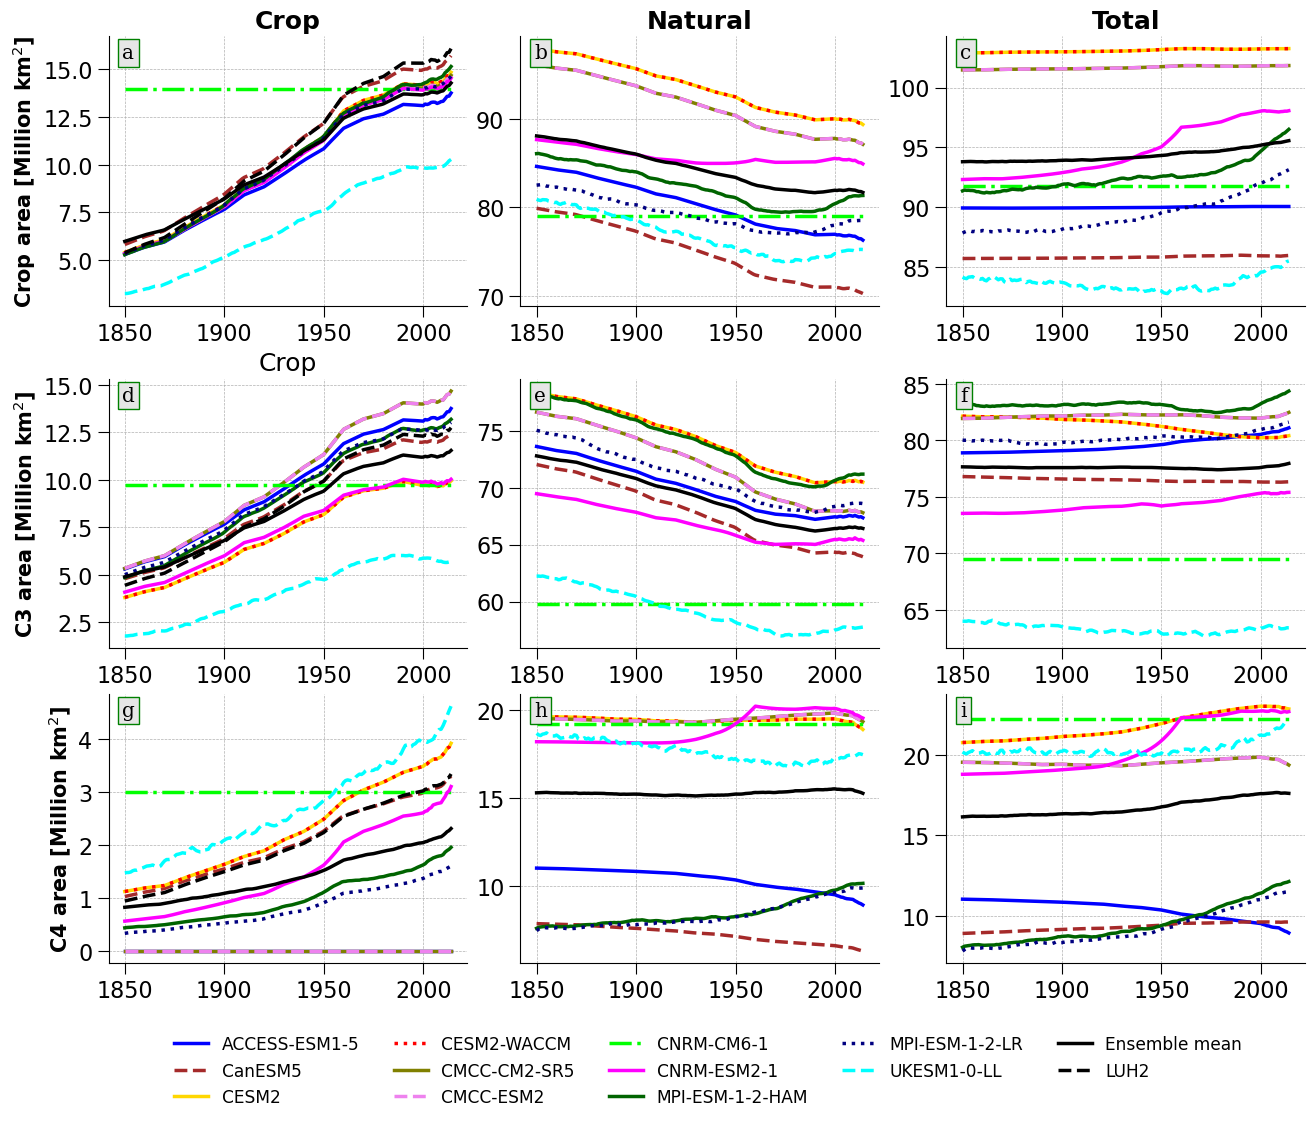

In [358]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment

# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(13, 10), layout="constrained")

years = np.arange(1850, 2015)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y=crp, mean=crp_mean)
axs['a'].set_ylabel('Crop area [Million km$^2$]', 
                    fontsize=15, weight = 'bold')
axs['a'].plot(years, (luh_crp/10**12), '--',linewidth = 2.5, 
          color = 'black', label ='LUH2')

axs['a'].set_title('Crop', fontsize=18, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

# Plotting the natural on the 'e' axis of the mosaic
plot_fig(ax=axs['b'], years=years, y=nat, mean=nat_mean)
axs['b'].set_title('Natural', fontsize=18, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['c'], years=years, y=tot, mean=tot_mean)
axs['c'].set_title('Total', fontsize=18, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5) 


# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['d'], years=years, y=crpC3, mean=crpC3_mean)

axs['d'].plot(years, (luh2['luh2_c3crp_Abun']/10**12), '--',linewidth = 2.5, 
          color = 'black', label ='LUH2')

axs['d'].set_ylabel('C3 area [Million km$^2$]', 
                    fontsize=15, weight = 'bold')
axs['d'].set_title('Crop', fontsize=18)
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the crop on the 'e' axis of the mosaic
plot_fig(ax=axs['e'], years=years, y=natC3, mean=natC3_mean)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total on the 'f' axis of the mosaic
plot_fig(ax=axs['f'], years=years, y=C3, mean=C3_mean)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the total on the 'g' axis of the mosaic
plot_fig(ax=axs['g'], years=years, y=crpC4, mean=crpC4_mean)

axs['g'].plot(years, (luh2['luh2_c4crp_Abun']/10**12), '--',linewidth = 2.5, 
          color = 'black', label ='LUH2')

axs['g'].set_ylabel('C4 area [Million km$^2$]' , 
                    fontsize=15, weight = 'bold')

axs['g'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_fig(ax=axs['h'], years=years, y=natC4, mean=natC4_mean)

axs['h'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'i' axis of the mosaic
plot_fig(ax=axs['i'], years=years, y=C4, mean=C4_mean)
axs['i'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=12.25, loc='upper left', ncol=5,
           bbox_to_anchor=(0.115, 0.3, 0.5, -0.315), frameon=False)



import matplotlib.transforms as mtransforms  # Add this line if transforms are needed

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
plt.savefig('Area_abundance_1850-2014.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


    
# Show the plot
plt.show()


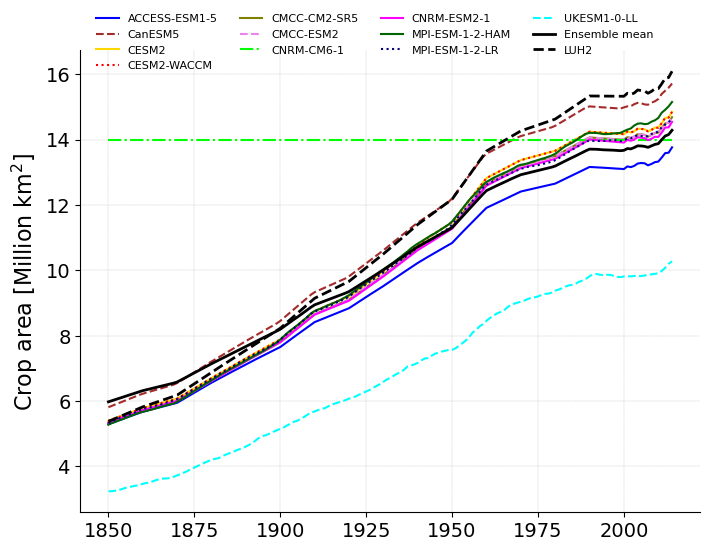

In [359]:
#Plot the content line

y = crp
mean = crp_mean

fig, ax = plt.subplots(figsize=(8,6))

colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']

for i in range(y.shape[0]):
    ax.plot(years, y[i]/10**6, linewidth = 1.5, label=labels[i], 
             linestyle=linestyles[i], color=colors[i])

plt.plot(years, (mean/10**6), linewidth = 2, 
         color = 'black', label ='Ensemble mean')

plt.plot(years, (luh_crp/10**12), '--',linewidth = 2, 
          color = 'black', label ='LUH2')

# Add a horizontal line at y=0
#ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5)

# Add labels and legend
#ax.set_xlabel('Year')
ax.set_ylabel('Crop area [Million km$^2$]', fontsize=16)
#ax.set_title('Crop')
ax.grid(linestyle='--', linewidth=0.25)
ax.tick_params(axis='both', which='major', labelsize=14)
# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncol=4, loc='upper left', frameon= False, fontsize = 8, 
                bbox_to_anchor=(0.01, 0.2, 0.5, 0.9))

# Save the figure
plt.savefig('crop_area_abundance.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


plt.show()


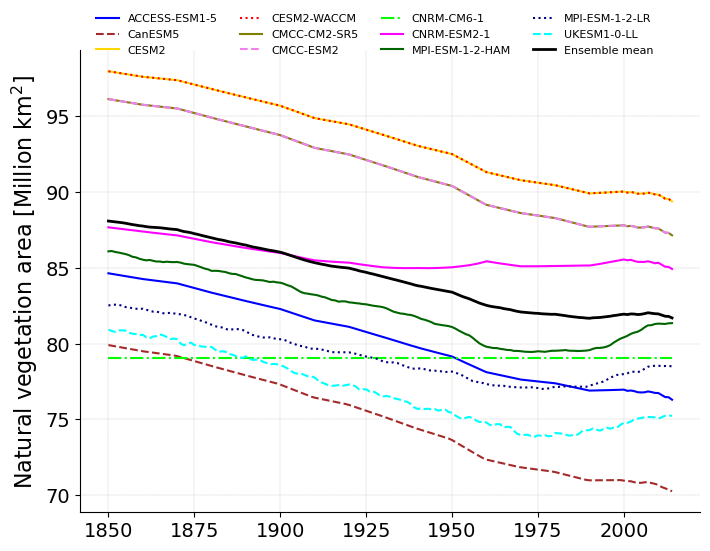

In [360]:
#Plot the content line

y = nat
mean = nat_mean

fig, ax = plt.subplots(figsize=(8,6))

colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']

for i in range(y.shape[0]):
    ax.plot(years, y[i]/10**6, linewidth = 1.5, label=labels[i], 
             linestyle=linestyles[i], color=colors[i])

plt.plot(years, (mean/10**6), linewidth = 2, 
         color = 'black', label ='Ensemble mean')

# Add a horizontal line at y=0
#ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5)

# Add labels and legend
#ax.set_xlabel('Year')
ax.set_ylabel('Natural vegetation area [Million km$^2$]', fontsize=16)
#ax.set_title('Crop')
ax.grid(linestyle='--', linewidth=0.25)
ax.tick_params(axis='both', which='major', labelsize=14)
# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncol=4, loc='upper left', frameon= False, fontsize = 8, 
                bbox_to_anchor=(0.01, 0.2, 0.5, 0.9))

# Save the figure
plt.savefig('nat_area_abundance.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


plt.show()


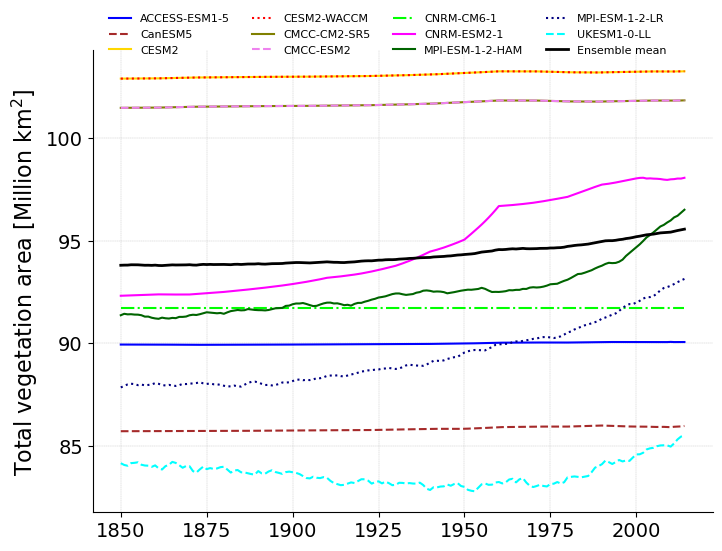

In [361]:
#Plot the content line

y = tot
mean = tot_mean

fig, ax = plt.subplots(figsize=(8,6))

colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']

for i in range(y.shape[0]):
    ax.plot(years, y[i]/10**6, linewidth = 1.5, label=labels[i], 
             linestyle=linestyles[i], color=colors[i])

plt.plot(years, (mean/10**6), linewidth = 2, 
         color = 'black', label ='Ensemble mean')

# Add a horizontal line at y=0
#ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5)

# Add labels and legend
#ax.set_xlabel('Year')
ax.set_ylabel('Total vegetation area [Million km$^2$]', fontsize=16)
#ax.set_title('Crop')
ax.grid(linestyle='--', linewidth=0.25)
ax.tick_params(axis='both', which='major', labelsize=14)
# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncol=4, loc='upper left', frameon= False, fontsize = 8, 
                bbox_to_anchor=(0.01, 0.2, 0.5, 0.9))

# Save the figure
plt.savefig('tot_area_abundance.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


plt.show()


# Plot the GPP

In [ ]:
cd path_to/veg_gpp

In [39]:
#Load the data
aces = pd.read_csv('aces_gpp_1850_2014.csv')
caes = pd.read_csv('caes_gpp_1850_2014.csv')
cesm = pd.read_csv('cesm_gpp_1850_2014.csv')
cewa = pd.read_csv('cewa_gpp_1850_2014.csv')
cmcs = pd.read_csv('cmcs_gpp_1850_2014.csv')
cmes = pd.read_csv('cmes_gpp_1850_2014.csv')
cncm = pd.read_csv('cncm_gpp_1850_2014.csv')
cnes = pd.read_csv('cnes_gpp_1850_2014.csv')
mpel = pd.read_csv('mpel_gpp_1850_2014.csv')
mpeh = pd.read_csv('mpeh_gpp_1850_2014.csv')
ukes = pd.read_csv('ukes_gpp_1850_2014.csv')

In [40]:
#Extract the crop gpp 
aces1 = aces['crpgpp']
caes1 = caes['crpgpp']
cesm1 = cesm['crpgpp']
cewa1 = cewa['crpgpp']
cmcs1 = cmcs['crpgpp']
cmes1 = cmcs['crpgpp']
cncm1 = cncm['crpgpp']
cnes1 = cnes['crpgpp']
mpeh1 = mpeh['crpgpp']
mpel1 = mpel['crpgpp']
ukes1 = ukes['crpgpp']

#Stack them together
crp = np.vstack([aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                   cncm1, cnes1, mpeh1, mpel1, ukes1])

#Calculate the ensemble mean
crp_mean = (aces1 + caes1 + cesm1 + cewa1 + cmcs1 + cmes1 + 
            cncm1 + cnes1 + mpeh1 + mpel1 + ukes1)/11

In [43]:
upp_range = caes1.iloc[-1] - crp_mean.iloc[-1]
low_range = ukes1.iloc[-1] - crp_mean.iloc[-1]

mean = crp_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 17.25709934062276
Lower range: -4.026449070795051
Upper range: 9.491359117461997


In [44]:
# Calculate the percentage ranges for crop gpp
lowerRange = crp_mean[164] - ukes1[164]
upperRange = caes1[164] - crp_mean[164]

lowerRange_percentage = (lowerRange/crp_mean[164])*100
upperRange_percentage = (upperRange/crp_mean[164])*100

print('Crop lower percentage range =', lowerRange_percentage)
print('Crop upper percentage range =', upperRange_percentage)

Crop lower percentage range = 23.33213126563452
Crop upper percentage range = 54.99973622519276


In [45]:
#Extract the total natural GPP

aces2 = aces['totNatgpp']
caes2 = caes['totNatgpp']
cesm2 = cesm['totNatgpp']
cewa2 = cewa['totNatgpp']
cmcs2 = cmcs['totNatgpp']
cmes2 = cmcs['totNatgpp']
cncm2 = cncm['totNatgpp']
cnes2 = cnes['totNatgpp']
mpeh2 = mpeh['totNatgpp']
mpel2 = mpel['totNatgpp']
ukes2 = ukes['totNatgpp']

#Stack them together
nat = np.vstack([aces2, caes2, cesm2, cewa2, cmcs2, cmes2, 
                   cncm2, cnes2, mpeh2, mpel2, ukes2])

#Calculate the ensemble mean
nat_mean = (aces2 + caes2 + cesm2 + cewa2 + cmcs2 + cmes2 + 
            cncm2 + cnes2 + mpeh2 + mpel2 + ukes2)/11

In [46]:
upp_range = mpeh2.iloc[-1] - nat_mean.iloc[-1]
low_range = cnes2.iloc[-1] - nat_mean.iloc[-1]

mean = nat_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 99.57155195740316
Lower range: -19.80191498838549
Upper range: 26.41263928084244


In [47]:
# Calculate the percentage ranges total natural GPP
lowerRange = nat_mean[164] - cnes2[164]
upperRange = mpeh2[164] - nat_mean[164]

lowerRange_percentage = (lowerRange/nat_mean[164])*100
upperRange_percentage = (upperRange/nat_mean[164])*100

print('Nat lower percentage range =', lowerRange_percentage)
print('Nat upper percentage range =', upperRange_percentage)

Nat lower percentage range = 19.887120968905634
Nat upper percentage range = 26.526290653922725


In [47]:
#Extract the total vegetation GPP
aces3 = aces['totVeggpp']
caes3 = caes['totVeggpp']
cesm3 = cesm['totVeggpp']
cewa3 = cewa['totVeggpp']
cmcs3 = cmcs['totVeggpp']
cmes3 = cmcs['totVeggpp']
cncm3 = cncm['totVeggpp']
cnes3 = cnes['totVeggpp']
mpeh3 = mpeh['totVeggpp']
mpel3 = mpel['totVeggpp']
ukes3 = ukes['totVeggpp']

#Stack them together
tot = np.vstack([aces3, caes3, cesm3, cewa3, cmcs3, cmes3, 
                   cncm3, cnes3, mpeh3, mpel3, ukes3])

#Calculate the ensemble mean
tot_mean = (aces3 + caes3 + cesm3 + cewa3 + cmcs3 + cmes3 + 
            cncm3 + cnes3 + mpeh3 + mpel3 + ukes3)/11

In [48]:
upp_range = mpeh3.iloc[-1] - tot_mean.iloc[-1]
low_range = cnes3.iloc[-1] - tot_mean.iloc[-1]

mean = tot_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 116.48708454519068
Lower range: -23.04692792023924
Upper range: 33.68090010327781


In [92]:
tot_df = pd.DataFrame(tot)

### Plot the % change in the GPP in the 20th century

In [108]:
# Extract the 2oth century
tot_gpp_df2 = (tot_df.T).iloc[51:151]

In [109]:
tot_gpp_df2.head(3)

0           1          2          3          4          5   \
51  91.021746  108.047957  90.750207  92.206549  86.773224  86.773224   
52  94.735039  106.914805  91.021505  92.615946  87.802099  87.802099   
53  95.864399  105.353076  91.613782  91.428681  87.802223  87.802223   

           6          7           8           9           10  
51  92.509323  77.140270  115.840833  110.106194  102.344694  
52  92.210562  76.860243  116.729932  109.080203  103.321732  
53  92.555862  77.194345  114.200558  107.118699  102.562315

In [110]:
tot_gpp_df2.tail(3)

0           1           2           3           4           5   \
148  106.057237  123.051854  104.975079  103.541877   96.770243   96.770243   
149  105.624883  123.892568  105.982476  104.475696  100.316390  100.316390   
150  109.793365  122.642769  105.382909  103.914493   99.816254   99.816254   

             6          7           8           9           10  
148  109.817458  90.421528  136.290835  130.448758  107.925850  
149  114.210364  92.625593  140.352415  136.326030  113.888867  
150  111.552199  87.070373  138.426180  133.715070  115.008724

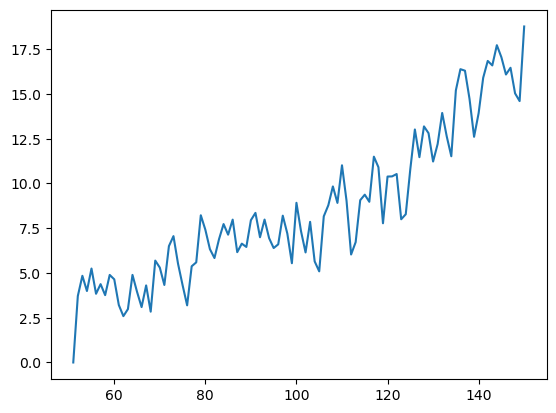

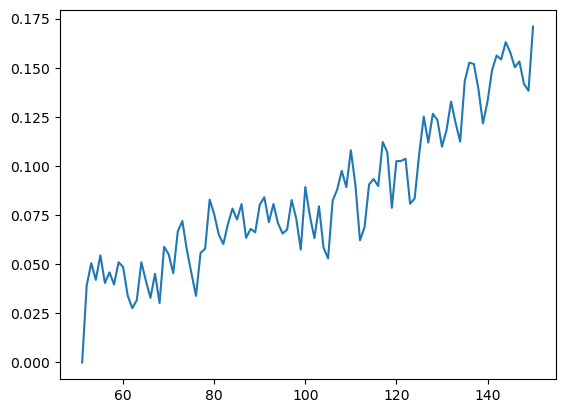

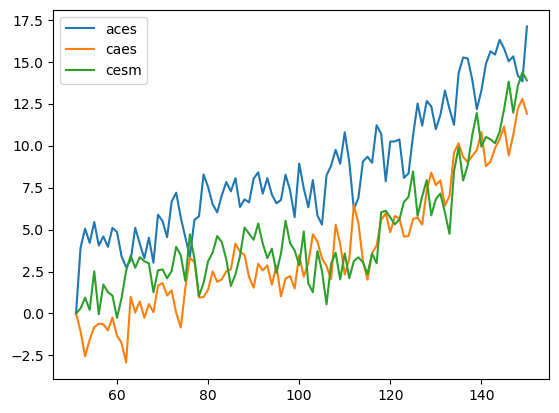

In [185]:
#Calculate percentage change in the 21st century
# Calculate the GPP change
tot_gpp_change = tot_gpp_df2 - tot_gpp_df2.iloc[0]
tot_gpp_change[0].plot()
plt.show()

#Fractional change
gpp_fract_change = tot_gpp_change/tot_gpp_df2
gpp_fract_change[0].plot()
plt.show()

# Percentage change
gpp_perc_change = gpp_fract_change *100
gpp_perc_change[0].plot(label = 'aces')
gpp_perc_change[1].plot(label = 'caes')
gpp_perc_change[2].plot(label = 'cesm')
plt.legend()
plt.show()

In [ ]:
#Fractional change
gpp_fract_change = tot_gpp_change/tot_gpp_df2
gpp_fract_change[0].plot()
plt.show()

# Percentage change
gpp_perc_change = gpp_fract_change *100
gpp_perc_change[0].plot(label = 'aces')
gpp_perc_change[1].plot(label = 'caes')
gpp_perc_change[2].plot(label = 'cesm')
plt.legend()
plt.show()

In [206]:
# Insert the mean into the total_GPP change 
models_mean = gpp_perc_change.mean(axis =1)

gpp_perc_change.insert(11, 'models_mean', models_mean)

In [207]:
# Rename all the columns

column_names =['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL', 'models_mean']

# Change the names
gpp_perc_change.columns = column_names

In [208]:
# Insert the year
years = np.arange(1901, 2001)
gpp_perc_change.insert(0, 'Years', years)

In [209]:
gpp_perc_change.head(3)

Years  ACCESS-ESM1-5   CanESM5     CESM2  CESM2-WACCM  CMCC-CM2-SR5  \
51   1901       0.000000  0.000000  0.000000     0.000000      0.000000   
52   1902       3.919661 -1.059865  0.298059     0.442037      1.171811   
53   1903       5.051565 -2.557951  0.942626    -0.850793      1.171951   

    CMCC-ESM2  CNRM-CM6-1  CNRM-ESM2-1  MPI-ESM-1-2-HAM  MPI-ESM-1-2-LR  \
51   0.000000    0.000000     0.000000         0.000000        0.000000   
52   1.171811   -0.323999    -0.364333         0.761672       -0.940584   
53   1.171951    0.050282     0.070049        -1.436310       -2.788957   

    UKESM1-0-LL  models_mean  
51     0.000000     0.000000  
52     0.945627     0.547445  
53     0.212184     0.094236

In [210]:
# Save it to CSV 

gpp_perc_change.to_csv('totalGPP_percentageChanges21stCentury_250708.csv', index=False)

In [211]:
cent21 = pd.read_csv('totalGPP_percentageChanges21stCentury_250708.csv')

In [212]:
cent21.head(3)

Years  ACCESS-ESM1-5   CanESM5     CESM2  CESM2-WACCM  CMCC-CM2-SR5  \
0   1901       0.000000  0.000000  0.000000     0.000000      0.000000   
1   1902       3.919661 -1.059865  0.298059     0.442037      1.171811   
2   1903       5.051565 -2.557951  0.942626    -0.850793      1.171951   

   CMCC-ESM2  CNRM-CM6-1  CNRM-ESM2-1  MPI-ESM-1-2-HAM  MPI-ESM-1-2-LR  \
0   0.000000    0.000000     0.000000         0.000000        0.000000   
1   1.171811   -0.323999    -0.364333         0.761672       -0.940584   
2   1.171951    0.050282     0.070049        -1.436310       -2.788957   

   UKESM1-0-LL  models_mean  
0     0.000000     0.000000  
1     0.945627     0.547445  
2     0.212184     0.094236

In [214]:
cent21['UKESM1-0-LL'].iloc[-1]

np.float64(11.011365045886247)

In [215]:
cent21['MPI-ESM-1-2-LR'].iloc[-1]

np.float64(17.65610733724857)

In [165]:
def plot_fig(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']

    for i in range(y.shape[1]):
        ax.plot(years, y.iloc[:, i], label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=1.5)

    ax.plot(years, mean, color='black', label='Ensemble mean', linestyle='-', linewidth=2.5)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    return ax

<Figure size 640x480 with 0 Axes>

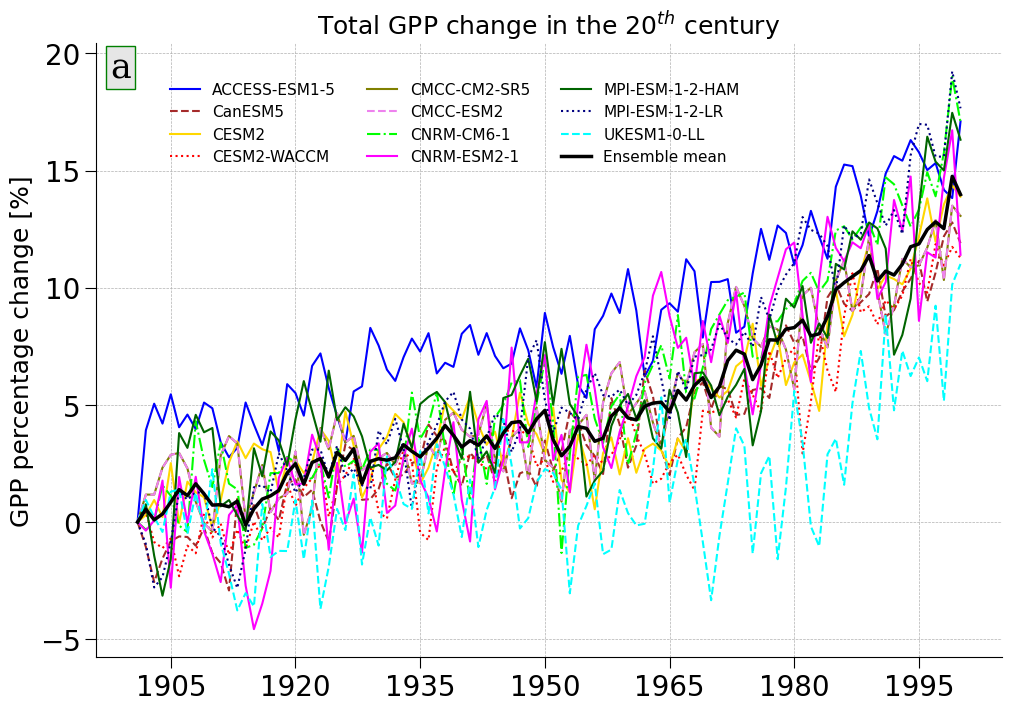

In [225]:
#Plot the content line


# Simulated data for demonstration
years = np.arange(1901, 2001)


# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a']], figsize=(10, 7), layout="constrained")

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y = gpp_perc_change.iloc[:, 1:12], mean = mean_gpp)
axs['a'].set_ylabel('GPP percentage change [%]', fontsize=18)
axs['a'].set_title('Total GPP change in the 20$^{th}$ century', fontsize=18)
axs['a'].tick_params(axis='both', which='both', labelsize=20, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)
#axs['a'].set_ylim(-0.2, 0.25)

# Make the legend
handles, labels = [], []
for ax_key in ['a']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

fig.legend(handles, labels, fontsize=11, loc='upper left', ncol=3,
           bbox_to_anchor=(0.15, 1.225, 0.9, -0.315), frameon=False)

# Add subplot labels
for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=25, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))


# Save the plot
#plt.savefig('totalGPP_percentageChanges21stCentury_250708.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)

    # Show the plot
plt.show()


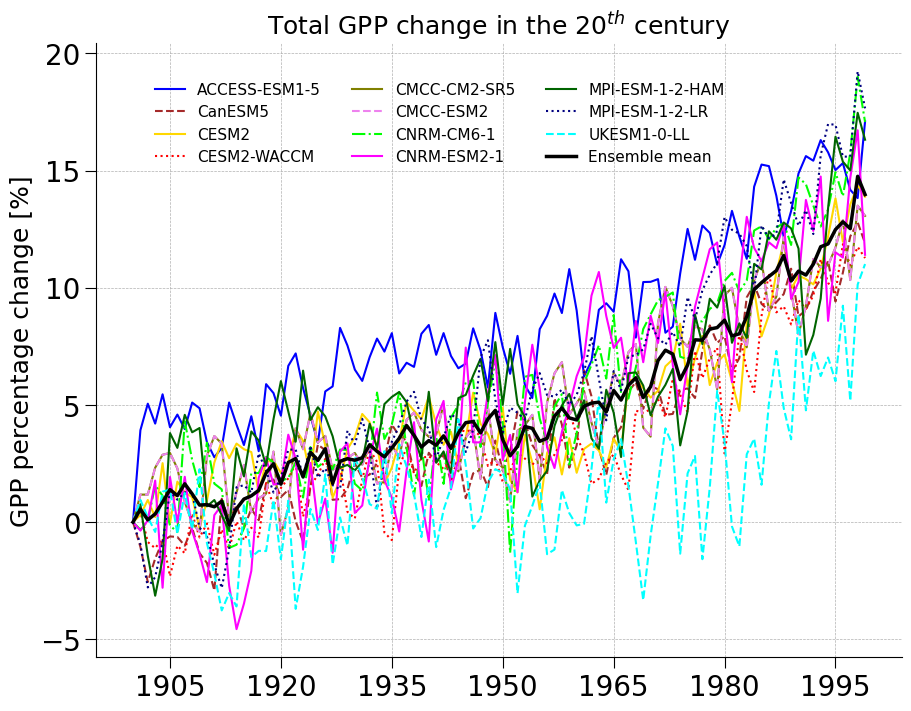

In [259]:
#Plot the content line


# Simulated data for demonstration
years = np.arange(1900, 2000)


# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a']], figsize=(9, 7), layout="constrained")

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y = gpp_perc_change.iloc[:, 1:12], mean = mean_gpp)
axs['a'].set_ylabel('GPP percentage change [%]', fontsize=18)
axs['a'].set_title('Total GPP change in the 20$^{th}$ century', fontsize=18)
axs['a'].tick_params(axis='both', which='both', labelsize=20, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)
#axs['a'].set_ylim(-0.2, 0.25)

# Make the legend
handles, labels = [], []
for ax_key in ['a']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

fig.legend(handles, labels, fontsize=11, loc='upper left', ncol=3,
           bbox_to_anchor=(0.15, 1.225, 0.9, -0.315), frameon=False)


# Save the plot
plt.savefig('totalGPP_percentageChanges21stCentury_250708a.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

In [49]:
# Calculate the percentage ranges for total vegetation GPP
lowerRange = tot_mean[164] - cnes3[164]
upperRange = mpeh3[164] - tot_mean[164]

lowerRange_percentage = (lowerRange/tot_mean[164])*100
upperRange_percentage = (upperRange/tot_mean[164])*100

print('tot lower percentage range =', lowerRange_percentage)
print('tot upper percentage range =', upperRange_percentage)

tot lower percentage range = 19.784964153084523
tot upper percentage range = 28.913849320532563


In [287]:
totMean_1850 = tot_mean[0]
totMean_2001 = tot_mean[151]
totMean_2014 = tot_mean[164]
totMean_change = totMean_2014-totMean_1850
totMean_change_percent = (totMean_change/totMean_1850)*100

print('totMean_1850 =', totMean_1850)
print('totMean_2001 =', totMean_2001)
print('totMean_2014 =', totMean_2014)
print('totMean_change =', totMean_change)
print('totMean_change_percent =', totMean_change_percent)

totMean_1850 = 93.53739341950042
totMean_2001 = 111.70030111393498
totMean_2014 = 116.48708454519068
totMean_change = 22.949691125690265
totMean_change_percent = 24.53531180066621


In [50]:
#Extract the the C3 crop GPP
aces4 = aces['crpC3gpp']
caes4 = caes['crpC3gpp']
cesm4 = cesm['crpC3gpp']
cewa4 = cewa['crpC3gpp']
cmcs4 = cmcs['crpC3gpp']
cmes4 = cmcs['crpC3gpp']
cncm4 = cncm['crpC3gpp']
cnes4 = cnes['crpC3gpp']
mpeh4 = mpeh['crpC3gpp']
mpel4 = mpel['crpC3gpp']
ukes4 = ukes['crpC3gpp']

#Stack them together
crpC3 = np.vstack([aces4, caes4, cesm4, cewa4, cmcs4, cmes4, 
                   cncm4, cnes4, mpeh4, mpel4, ukes4])

#Calculate the ensemble mean
crpC3_mean = (aces4 + caes4 + cesm4 + cewa4 + cmcs4 + cmes4 + 
            cncm4 + cnes4 + mpeh4 + mpel4 + ukes4)/11

In [52]:
upp_range = caes4.iloc[-1] - crpC3_mean.iloc[-1]
low_range = ukes4.iloc[-1] - crpC3_mean.iloc[-1]

mean = crpC3_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 13.78080667881652
Lower range: -8.209448598007336
Upper range: 6.869040120150265


In [51]:
# Calculate the percentage ranges for C3 crop
lowerRange = crpC3_mean[164] - ukes4[164]
upperRange = mpeh4[164] - crpC3_mean[164]

lowerRange_percentage = (lowerRange/crpC3_mean[164])*100
upperRange_percentage = (upperRange/crpC3_mean[164])*100

print('crpC3 lower percentage range =', lowerRange_percentage)
print('crpC3 upper percentage range =', upperRange_percentage)

crpC3 lower percentage range = 59.571611367472975
crpC3 upper percentage range = 51.292739949605995


In [53]:
#Extract the C4 crop GPP
aces4a = aces['crpC4gpp']
caes4a = caes['crpC4gpp']
cesm4a = cesm['crpC4gpp']
cewa4a = cewa['crpC4gpp']
cmcs4a = cmcs['crpC4gpp']
cmes4a = cmcs['crpC4gpp']
cncm4a = cncm['crpC4gpp']
cnes4a = cnes['crpC4gpp']
mpeh4a = mpeh['crpC4gpp']
mpel4a = mpel['crpC4gpp']
ukes4a = ukes['crpC4gpp']

#Stack them together
crpC4 = np.vstack([aces4a, caes4a, cesm4a, cewa4a, cmcs4a, cmes4a, 
                   cncm4a, cnes4a, mpeh4a, mpel4a, ukes4a])

#Calculate the ensemble mean
crpC4_mean = (aces4a + caes4a + cesm4a + cewa4a + cmcs4a + cmes4a + 
            cncm4a + cnes4a + mpeh4a + mpel4a + ukes4a)/11

In [56]:
upp_range = ukes4a.iloc[-1] - crpC4_mean.iloc[-1]
low_range = cmes4a.iloc[-1] - crpC4_mean.iloc[-1]

mean = crpC4_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 3.1347259212535477
Lower range: -3.1347259212535477
Upper range: 4.524566195226937


In [53]:
# Calculate the percentage ranges for C4 crop
lowerRange = crpC4_mean[164] - cmcs4a[164]
upperRange = ukes4a[164] - crpC4_mean[164]

lowerRange_percentage = (lowerRange/crpC4_mean[164])*100
upperRange_percentage = (upperRange/crpC4_mean[164])*100

print('crpC4 lower percentage range =', lowerRange_percentage)
print('crpC4 upper percentage range =', upperRange_percentage)

crpC4 lower percentage range = 100.0
crpC4 upper percentage range = 144.33689926606422


In [58]:
#Extract the natural C3 GPP
aces5 = aces['natC3gpp']
caes5 = caes['natC3gpp']
cesm5 = cesm['natC3gpp']
cewa5 = cewa['natC3gpp']
cmcs5 = cmcs['natC3gpp']
cmes5 = cmcs['natC3gpp']
cncm5 = cncm['natC3gpp']
cnes5 = cnes['natC3gpp']
mpeh5 = mpeh['natC3gpp']
mpel5 = mpel['natC3gpp']
ukes5 = ukes['natC3gpp']

#Stack them together
natC3 = np.vstack([aces5, caes5, cesm5, cewa5, cmcs5, cmes5, 
                   cncm5, cnes5, mpeh5, mpel5, ukes5])

#Calculate the ensemble mean
natC3_mean = (aces5 + caes5 + cesm5 + cewa5 + cmcs5 + cmes5 + 
            cncm5 + cnes5 + mpeh5 + mpel5 + ukes5)/11

In [59]:
upp_range = mpeh5.iloc[-1] - natC3_mean.iloc[-1]
low_range = cnes5.iloc[-1] - natC3_mean.iloc[-1]

mean = natC3_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 81.97089747297565
Lower range: -19.81310147865633
Upper range: 23.313251815769448


In [55]:
# Calculate the percentage ranges for natural C3 veg
lowerRange = natC3_mean[164] - cnes5[164]
upperRange = mpeh5[164] - natC3_mean[164]

lowerRange_percentage = (lowerRange/natC3_mean[164])*100
upperRange_percentage = (upperRange/natC3_mean[164])*100

print('natC3 lower percentage range =', lowerRange_percentage)
print('natC3 upper percentage range =', upperRange_percentage)

natC3 lower percentage range = 24.17089734217971
natC3 upper percentage range = 28.440888820883547


In [60]:
#Extract the absolute total carbon content 
aces5a = aces['natC4gpp']
caes5a = caes['natC4gpp']
cesm5a = cesm['natC4gpp']
cewa5a = cewa['natC4gpp']
cmcs5a = cmcs['natC4gpp']
cmes5a = cmcs['natC4gpp']
cncm5a = cncm['natC4gpp']
cnes5a = cnes['natC4gpp']
mpeh5a = mpeh['natC4gpp']
mpel5a = mpel['natC4gpp']
ukes5a = ukes['natC4gpp']

#Stack them together
natC4 = np.vstack([aces5a, caes5a, cesm5a, cewa5a, cmcs5a, cmes5a, 
                   cncm5a, cnes5a, mpeh5a, mpel5a, ukes5a])

#Calculate the ensemble mean
natC4_mean = (aces5a + caes5a + cesm5a + cewa5a + cmcs5a + cmes5a + 
            cncm5a + cnes5a + mpeh5a + mpel5a + ukes5a)/11

In [61]:
upp_range = cncm5a.iloc[-1] - natC4_mean.iloc[-1]
low_range = caes5a.iloc[-1] - natC4_mean.iloc[-1]

mean = natC4_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 17.600654486979785
Lower range: -8.355744717796757
Upper range: 8.059681366481616


In [57]:
# Calculate the percentage ranges for natural C4 vegetation
lowerRange = natC4_mean[164] - caes5a[164]
upperRange = cncm5a[164] - natC4_mean[164]

lowerRange_percentage = (lowerRange/natC4_mean[164])*100
upperRange_percentage = (upperRange/natC4_mean[164])*100

print('natC4 lower percentage range =', lowerRange_percentage)
print('natC4 upper percentage range =', upperRange_percentage)

natC4 lower percentage range = 47.47405685384018
natC4 upper percentage range = 45.791941273796525


In [62]:
#Extract the absolute total carbon content 
aces6 = aces['C3gpp']
caes6 = caes['C3gpp']
cesm6 = cesm['C3gpp']
cewa6 = cewa['C3gpp']
cmcs6 = cmcs['C3gpp']
cmes6 = cmcs['C3gpp']
cncm6 = cncm['C3gpp']
cnes6 = cnes['C3gpp']
mpeh6 = mpeh['C3gpp']
mpel6 = mpel['C3gpp']
ukes6 = ukes['C3gpp']

#Stack them together
C3 = np.vstack([aces6, caes6, cesm6, cewa6, cmcs6, cmes6, 
                   cncm6, cnes6, mpeh6, mpel6, ukes6])

#Calculate the ensemble mean
C3_mean = (aces6 + caes6 + cesm6 + cewa6 + cmcs6 + cmes6 + 
            cncm6 + cnes6 + mpeh6 + mpel6 + ukes6)/11

In [63]:
upp_range = mpeh6.iloc[-1] - C3_mean.iloc[-1]
low_range = cnes6.iloc[-1] - C3_mean.iloc[-1]

mean = C3_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 95.7517041464805
Lower range: -23.189543413209876
Upper range: 30.381805183759198


In [59]:
# Calculate the percentage ranges for all C3 vegetation
lowerRange = C3_mean[164] - cnes6[164]
upperRange = mpeh6[164] - C3_mean[164]

lowerRange_percentage = (lowerRange/C3_mean[164])*100
upperRange_percentage = (upperRange/C3_mean[164])*100

print('C3 lower percentage range =', lowerRange_percentage)
print('C3 upper percentage range =', upperRange_percentage)

C3 lower percentage range = 24.218413259501492
C3 upper percentage range = 31.729780116791712


In [285]:
C3Mean_1850 = C3_mean[0]
C3Mean_2001 = C3_mean[151]
C3Mean_2014 = C3_mean[164]
C3Mean_change = C3Mean_2014-C3Mean_1850
C3Mean_change_percent = (C3Mean_change/C3Mean_1850)*100

print('C3Mean_1850 =', C3Mean_1850)
print('C3Mean_2001 =', C3Mean_2001)
print('C3Mean_2014 =', C3Mean_2014)
print('C3Mean_change =', C3Mean_change)
print('C3Mean_change_percent =', C3Mean_change_percent)

C3Mean_1850 = 78.3929651644113
C3Mean_2001 = 91.75783299693906
C3Mean_2014 = 95.7517041464805
C3Mean_change = 17.358738982069212
C3Mean_change_percent = 22.143235615164233


In [64]:
#Extract the GPP for all the C3 vegetation
aces6a = aces['C4gpp']
caes6a = caes['C4gpp']
cesm6a = cesm['C4gpp']
cewa6a = cewa['C4gpp']
cmcs6a = cmcs['C4gpp']
cmes6a = cmcs['C4gpp']
cncm6a = cncm['C4gpp']
cnes6a = cnes['C4gpp']
mpeh6a = mpeh['C4gpp']
mpel6a = mpel['C4gpp']
ukes6a = ukes['C4gpp']

#Stack them together
C4 = np.vstack([aces6a, caes6a, cesm6a, cewa6a, cmcs6a, cmes6a, 
                   cncm6a, cnes6a, mpeh6a, mpel6a, ukes6a])

#Calculate the ensemble mean
C4_mean = (aces6a + caes6a + cesm6a + cewa6a + cmcs6a + cmes6a + 
            cncm6a + cnes6a + mpeh6a + mpel6a + ukes6a)/11

In [65]:
upp_range = cncm6a.iloc[-1] - C4_mean.iloc[-1]
low_range = aces6a.iloc[-1] - C4_mean.iloc[-1]

mean = C4_mean.iloc[-1]
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 20.735380408188714
Lower range: -8.844968495181334
Upper range: 9.421037221169481


In [97]:
# make a dataframe of GPP data
data = {'gppVariables': ['crpC4', 'natC4', 'totC4', 'crpC3', 
                         'natC3', 'totC3', 'crop', 'nat', 'tot'],
       'Values': [3, 18, 21, 14, 82, 96, 17, 100, 116]}
gppdf = pd.DataFrame(data)
gppdf

gppVariables  Values
0        crpC4       3
1        natC4      18
2        totC4      21
3        crpC3      14
4        natC3      82
5        totC3      96
6         crop      17
7          nat     100
8          tot     116

## Calculate and Plot Percentage

In [262]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator #For ticks adjustment

def plot_fig(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
    
    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i], label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2)
    
    # Plot the ensemble mean line
    ax.plot(years, mean, color='black', 
            label='Ensemble mean', linestyle='-', linewidth=2)
    
    return ax


In [35]:
# calculate the C4 percentage

aces_perC4 = aces6a/aces3*100
caes_perC4 = caes6a/caes3*100
cesm_perC4 = cesm6a/cesm3*100
cewa_perC4 = cewa6a/cewa3*100
cmcs_perC4 = cmcs6a/cmcs3*100
cmes_perC4 = cmes6a/cmes3*100
cncm_perC4 = cncm6a/cncm3*100
cnes_perC4 = cnes6a/cnes3*100
mpeh_perC4 = mpeh6a/mpeh3*100
mpel_perC4 = mpel6a/mpel3*100
ukes_perC4 = ukes6a/ukes3*100

#Stack them together
C4_per = np.vstack([aces_perC4, caes_perC4, cesm_perC4, cewa_perC4, cmcs_perC4, 
                    cmes_perC4, cncm_perC4, cnes_perC4, mpeh_perC4, mpel_perC4, 
                    ukes_perC4])

#Calculate the ensemble mean
C4_per_mean = (aces_perC4 + caes_perC4 + cesm_perC4 + cewa_perC4 + cmcs_perC4 + 
               cmes_perC4 + cncm_perC4 + cnes_perC4 + mpeh_perC4 + mpel_perC4 + 
               ukes_perC4)/11

In [36]:

aces_perC3 = aces6/aces3*100
caes_perC3 = caes6/caes3*100
cesm_perC3 = cesm6/cesm3*100
cewa_perC3 = cewa6/cewa3*100
cmcs_perC3 = cmcs6/cmcs3*100
cmes_perC3 = cmes6/cmes3*100
cncm_perC3 = cncm6/cncm3*100
cnes_perC3 = cnes6/cnes3*100
mpeh_perC3 = mpeh6/mpeh3*100
mpel_perC3 = mpel6/mpel3*100
ukes_perC3 = ukes6/ukes3*100

#Stack them together
C3_per = np.vstack([aces_perC3, caes_perC3, cesm_perC3, cewa_perC3, cmcs_perC3, 
                    cmes_perC3, cncm_perC3, cnes_perC3, mpeh_perC3, mpel_perC3, 
                    ukes_perC3])

#Calculate the ensemble mean
C3_per_mean = (aces_perC3 + caes_perC3 + cesm_perC3 + cewa_perC3 + cmcs_perC3 + 
               cmes_perC3 + cncm_perC3 + cnes_perC3 + mpeh_perC3 + mpel_perC3 + 
               ukes_perC3)/11

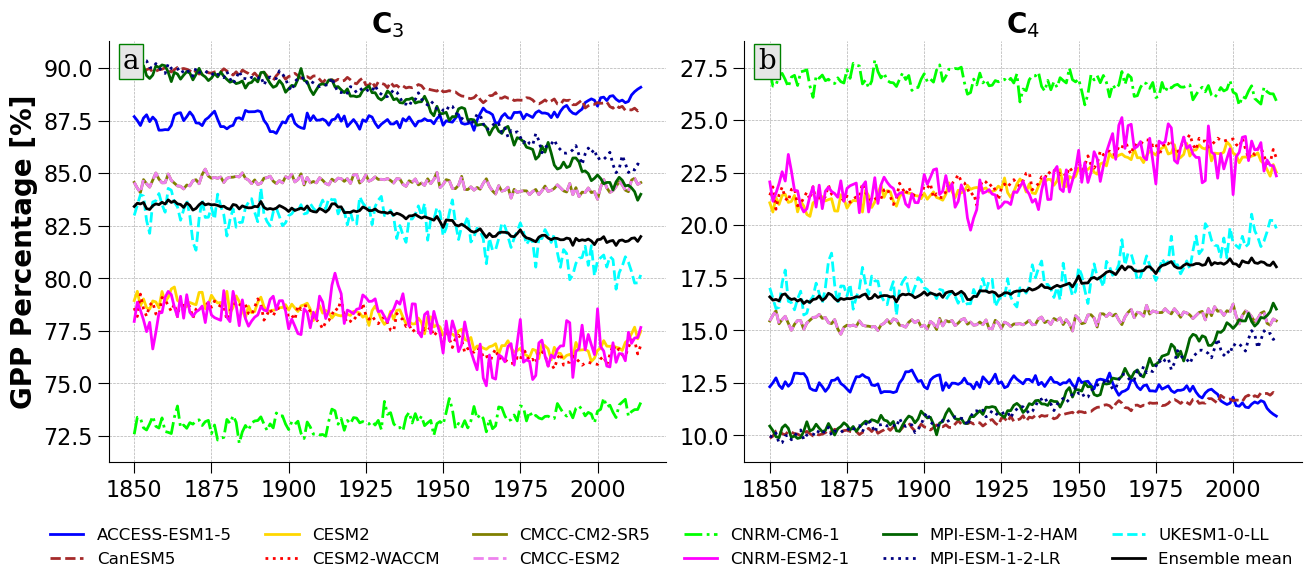

In [264]:
# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b']],
                              figsize=(13, 5), layout="constrained")

years = x = np.arange(1850, 2015)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y=C3_per, mean=C3_per_mean)
axs['a'].set_ylabel('GPP Percentage [%]', 
                    fontsize=20, weight = 'bold')

#axs['a'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['a'].set_title('C${_3}$', fontsize=20, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

#axs['a'].legend(fontsize=8, loc='upper right', ncol=2, 
                #bbox_to_anchor=(0.55, 0.3, 0.5, 0.15), frameon=False)


# Plotting the natural on the 'e' axis of the mosaic
plot_fig(ax=axs['b'], years=years, y=C4_per, mean=C4_per_mean)
#axs['b'].set_ylabel('Carbon accumulation since 1850 [PgCyr$^{-1}$]', fontsize=12)
#axs['b'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['b'].set_title('C${_4}$', fontsize=20, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 

#Make the legend
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['a', 'b']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=12, loc='upper left', ncol=6,
           bbox_to_anchor=(0.0225, 0.3, 0.5, -0.315), frameon=False)


# Add this line if transforms are needed
import matplotlib.transforms as mtransforms  

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='20', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
plt.savefig('c3c4gpp_Percentage_1850_2014.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


    
# Show the plot
plt.show()


In [61]:
# Calculate the percentage ranges for all C4 vegetation
lowerRange = C4_mean[164] - aces6a[164]
upperRange = cncm6a[164] - C4_mean[164]

lowerRange_percentage = (lowerRange/C4_mean[164])*100
upperRange_percentage = (upperRange/C4_mean[164])*100

print('C4 lower percentage range =', lowerRange_percentage)
print('C4 upper percentage range =', upperRange_percentage)

C4 lower percentage range = 42.65640813461191
C4 upper percentage range = 45.43460035798992


In [286]:
C4Mean_1850 = C4_mean[0]
C4Mean_2001 = C4_mean[151]
C4Mean_2014 = C4_mean[164]
C4Mean_change = C4Mean_2014-C4Mean_1850
C4Mean_change_percent = (C4Mean_change/C4Mean_1850)*100

print('C4Mean_1850 =', C4Mean_1850)
print('C4Mean_2001 =', C4Mean_2001)
print('C4Mean_2014 =', C4Mean_2014)
print('C4Mean_change =', C4Mean_change)
print('C4Mean_change_percent =', C4Mean_change_percent)

C4Mean_1850 = 15.144428257761017
C4Mean_2001 = 19.942468119240235
C4Mean_2014 = 20.735380408188714
C4Mean_change = 5.590952150427697
C4Mean_change_percent = 36.91755182347355


In [288]:
20.75/116.487*100

17.8131465313726

In [486]:
# Combine all the GPP means into one dataframe and save it to CSV

model_means11_gpp = pd.concat([aces['time'], crpC3_mean, crpC4_mean, crp_mean, natC3_mean, 
                               natC4_mean,  nat_mean, C3_mean, C4_mean, tot_mean], axis = 1)

In [488]:
model_means11_gpp.head(1)

time  crpC3gpp  crpC4gpp    crpgpp   natC3gpp   natC4gpp  totNatgpp  \
0  1850-12-31  4.666509  0.891873  5.727879  73.726457  14.252555  87.979012   

       C3gpp      C4gpp  totVeggpp  
0  78.392965  15.144428  93.537393

In [490]:
model_means11_gpp.to_csv('GPP_modelsMean_1850_2014.csv', index = True)

In [489]:
pwd

'/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/models_ouputs/veg_gpp'

In [485]:
aces.head(2)

time      C3gpp      C4gpp    crpgpp  crpC3gpp  crpC4gpp   natC3gpp  \
0  1850-12-31  79.019932  11.093729  4.289981  4.289981       0.0  74.729951   
1  1851-12-31  80.059749  11.433643  4.177792  4.177792       0.0  75.881957   

    natC4gpp  totNatgpp  totVeggpp  
0  11.093729  85.823680  90.113661  
1  11.433643  87.315599  91.493392

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator #For ticks adjustment

def plot_fig(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
    
    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i], label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2)
    
    # Plot the ensemble mean line
    ax.plot(years, mean, color='black', 
            label='Ensemble mean', linestyle='-', linewidth=2)
    
    return ax


In [322]:
cd fig/

/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/models_ouputs/veg_gpp/fig


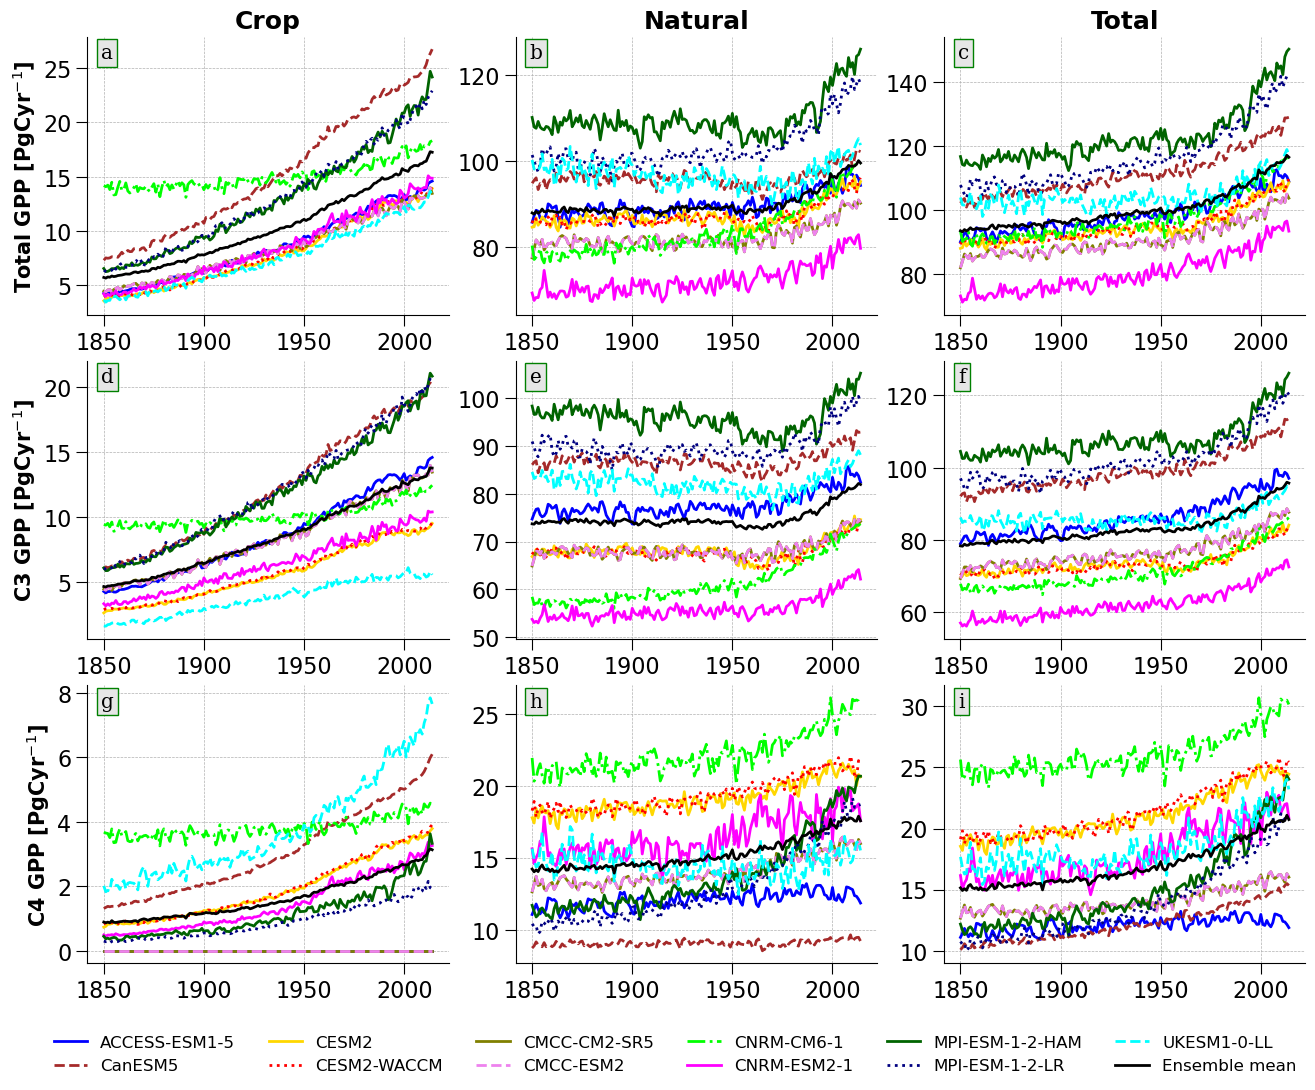

In [327]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment

# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(13, 10), layout="constrained")

years = x = np.arange(1850, 2015)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y=crp, mean=crp_mean)
axs['a'].set_ylabel('Total GPP [PgCyr$^{-1}$]', 
                    fontsize=15, weight = 'bold')

#axs['a'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['a'].set_title('Crop', fontsize=18, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

#axs['a'].legend(fontsize=8, loc='upper right', ncol=2, 
                #bbox_to_anchor=(0.55, 0.3, 0.5, 0.15), frameon=False)


# Plotting the natural on the 'e' axis of the mosaic
plot_fig(ax=axs['b'], years=years, y=nat, mean=nat_mean)
#axs['b'].set_ylabel('Carbon accumulation since 1850 [PgCyr$^{-1}$]', fontsize=12)
#axs['b'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['b'].set_title('Natural', fontsize=18, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['c'], years=years, y=tot, mean=tot_mean)
#axs['c'].set_ylabel('Carbon accumulation since 1850 [PgCyr$^{-1}$]', fontsize=12)
#axs['c'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['c'].set_title('Total', fontsize=18, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5) 


# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['d'], years=years, y=crpC3, mean=crpC3_mean)

axs['d'].set_ylabel('C3 GPP [PgCyr$^{-1}$]', 
                    fontsize=15, weight = 'bold')
#axs['d'].set_xlabel('Carbon flux [PgCyr$^{-1}$]', fontsize=18)
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the crop on the 'e' axis of the mosaic
plot_fig(ax=axs['e'], years=years, y=natC3, mean=natC3_mean)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total on the 'f' axis of the mosaic
plot_fig(ax=axs['f'], years=years, y=C3, mean=C3_mean)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the total on the 'g' axis of the mosaic
plot_fig(ax=axs['g'], years=years, y=crpC4, mean=crpC4_mean)

axs['g'].set_ylabel('C4 GPP [PgCyr$^{-1}$]' , 
                    fontsize=15, weight = 'bold')

axs['g'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_fig(ax=axs['h'], years=years, y=natC4, mean=natC4_mean)

axs['h'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'i' axis of the mosaic
plot_fig(ax=axs['i'], years=years, y=C4, mean=C4_mean)
axs['i'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=12, loc='upper left', ncol=6,
           bbox_to_anchor=(0.0225, 0.3, 0.5, -0.315), frameon=False)


# Add this line if transforms are needed
import matplotlib.transforms as mtransforms  

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
plt.savefig('gpp_1850-2014.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


    
# Show the plot
plt.show()


# Ploting the Crop Mean and Change

# CESM2

In [ ]:
cd /path_to/CESM2

In [145]:
cesm3 = xr.open_dataset('c3PftFrac_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc',
                        decode_times = True)
cesm4 = xr.open_dataset('c4PftFrac_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc',
                        decode_times = True)
cesmc = xr.open_dataset('cropFrac_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc',
                        decode_times = True)

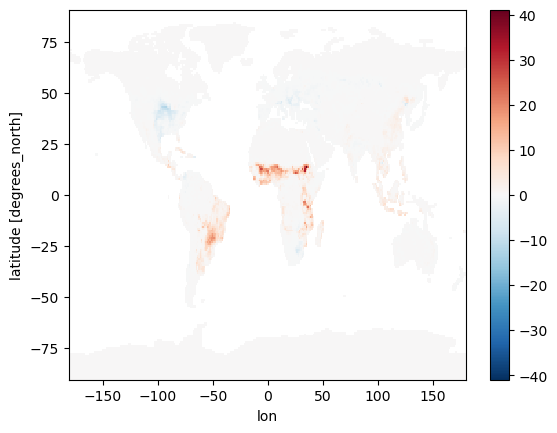

In [146]:
#Slice the time
cesm3a = (cesm3.c3PftFrac).sel(time=slice('1970', '2015'))
cesm4a = (cesm4.c4PftFrac).sel(time=slice('1970', '2015'))
cesmc1 = (cesmc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
cesm3b = cesm3a.resample(time= 'Y').mean()
cesm4b = cesm4a.resample(time= 'Y').mean()
cesmc2 = cesmc1.resample(time= 'Y').mean()

# Calculate percentage C3 and c4 crop coverage

cesm3c = cesm3b * cesmc2 / 100
cesm4c = cesm4b * cesmc2 / 100

#Calculate the mean
cesmC3_mean = cesm3c.mean(('time'))
cesmC4_mean = cesm4c.mean(('time'))

# Calculate the change
cesmC3_change = cesm3c[-1] - cesm3c[0]
cesmC4_change = cesm4c[-1] - cesm4c[0]

#Rearrange the latitude of the mean 

# Adjust longitudes to [-180, 180] range
cesmC3_mean['lon'] = (cesmC3_mean['lon'] + 180) % 360 - 180  

# Sort by longitude
cesmC3_mean = cesmC3_mean.sortby('lon')  

# Adjust longitudes to [-180, 180] range
cesmC4_mean['lon'] = (cesmC4_mean['lon'] + 180) % 360 - 180

# Sort by longitude
cesmC4_mean = cesmC4_mean.sortby('lon') 

#Rearrange the latitude of the change 

# Adjust longitudes to [-180, 180] range
cesmC3_change['lon'] = (cesmC3_change['lon'] + 180) % 360 - 180

# Sort by longitude
cesmC3_change = cesmC3_change.sortby('lon')  

# Adjust longitudes to [-180, 180] range
cesmC4_change['lon'] = (cesmC4_change['lon'] + 180) % 360 - 180

# Sort by longitude
cesmC4_change = cesmC4_change.sortby('lon')

# Visualize
cesmC4_change.plot()

# UKESM1-0-LL

In [152]:
cd /path_to/UKESM1-0-LL/

/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/UKESM1-0-LL


In [27]:
ukes3 = xr.open_mfdataset('c3PftFrac/*.nc', decode_times = True)
ukes4 = xr.open_mfdataset('c4PftFrac/*.nc', decode_times = True)
ukesc = xr.open_mfdataset('cropFrac/*.nc', decode_times = True)

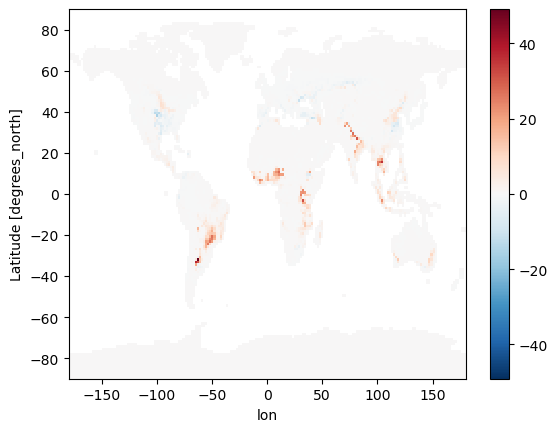

In [154]:
#Slice the time
ukes3a = (ukes3.c3PftFrac).sel(time=slice('1970', '2015'))
ukes4a = (ukes4.c4PftFrac).sel(time=slice('1970', '2015'))
ukesc1 = (ukesc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
ukes3b = ukes3a.resample(time= 'Y').mean()
ukes4b = ukes4a.resample(time= 'Y').mean()
ukesc2 = ukesc1.resample(time= 'Y').mean()

# Calculate percentage C3 and c4 crop coverage

ukes3c = ukes3b * ukesc2 / 100
ukes4c = ukes4b * ukesc2 / 100

#Calculate the mean
ukesC3_mean = ukes3c.mean(('time'))
ukesC4_mean = ukes4c.mean(('time'))

# Calculate the change
ukesC3_change = ukes3c[-1] - ukes3c[0]
ukesC4_change = ukes4c[-1] - ukes4c[0]

#Rearrange the latitude of the mean 

# Adjust longitudes to [-180, 180] range
ukesC3_mean['lon'] = (ukesC3_mean['lon'] + 180) % 360 - 180  

# Sort by longitude
ukesC3_mean = ukesC3_mean.sortby('lon')  

# Adjust longitudes to [-180, 180] range
ukesC4_mean['lon'] = (ukesC4_mean['lon'] + 180) % 360 - 180

# Sort by longitude
ukesC4_mean = ukesC4_mean.sortby('lon') 

#Rearrange the latitude of the change 

# Adjust longitudes to [-180, 180] range
ukesC3_change['lon'] = (ukesC3_change['lon'] + 180) % 360 - 180

# Sort by longitude
ukesC3_change = ukesC3_change.sortby('lon')  

# Adjust longitudes to [-180, 180] range
ukesC4_change['lon'] = (ukesC4_change['lon'] + 180) % 360 - 180

# Sort by longitude
ukesC4_change = ukesC4_change.sortby('lon')

# Visualize
ukesC4_change.plot()

# CNRM-CM6-1

In [ ]:
cd /path_to/CNRM-CM6-1/

In [30]:
cncm3 = xr.open_dataset('c3PftFrac_Lmon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc',
                        decode_times = True)
cncm4 = xr.open_dataset('c4PftFrac_Lmon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc',
                        decode_times = True)
cncmc = xr.open_dataset('cropFrac_Lmon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc',
                        decode_times = True)

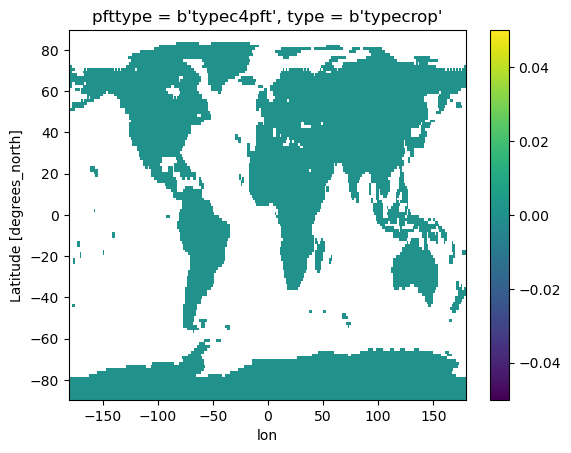

In [150]:
#Slice the time
cncm3a = (cncm3.c3PftFrac).sel(time=slice('1970', '2015'))
cncm4a = (cncm4.c4PftFrac).sel(time=slice('1970', '2015'))
cncmc1 = (cncmc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
cncm3b = cncm3a.resample(time= 'Y').mean()
cncm4b = cncm4a.resample(time= 'Y').mean()
cncmc2 = cncmc1.resample(time= 'Y').mean()

# Calculate percentage C3 and c4 crop coverage

cncm3c = cncm3b * cncmc2 / 100
cncm4c = cncm4b * cncmc2 / 100

#Calculate the mean
cncmC3_mean = cncm3c.mean(('time'))
cncmC4_mean = cncm4c.mean(('time'))

# Calculate the change
cncmC3_change = cncm3c[-1] - cncm3c[0]
cncmC4_change = cncm4c[-1] - cncm4c[0]

#Rearrange the latitude of the mean 

# Adjust longitudes to [-180, 180] range
cncmC3_mean['lon'] = (cncmC3_mean['lon'] + 180) % 360 - 180  

# Sort by longitude
cncmC3_mean = cncmC3_mean.sortby('lon')  

# Adjust longitudes to [-180, 180] range
cncmC4_mean['lon'] = (cncmC4_mean['lon'] + 180) % 360 - 180

# Sort by longitude
cncmC4_mean = cncmC4_mean.sortby('lon') 

#Rearrange the latitude of the change 

# Adjust longitudes to [-180, 180] range
cncmC3_change['lon'] = (cncmC3_change['lon'] + 180) % 360 - 180

# Sort by longitude
cncmC3_change = cncmC3_change.sortby('lon')  

# Adjust longitudes to [-180, 180] range
cncmC4_change['lon'] = (cncmC4_change['lon'] + 180) % 360 - 180

# Sort by longitude
cncmC4_change = cncmC4_change.sortby('lon')

# Visualize
cncmC4_change.plot()

# LUH2

In [31]:
# Load the data
luh = xr.open_dataset('/path_to/luh_0850-2015.nc',
                        decode_times = False)


In [35]:
# Calculate C3 and C4 crops

luh_c3 = luh.c3ann+luh.c3per+luh.c3nfx
luh_c4 = luh.c4ann+luh.c4per

# Slice out 1970 and 2014
luh_c3a = luh_c3.sel(time=slice(1120, 1164))
luh_c4a = luh_c4.sel(time=slice(1120, 1164))

#Calculate the lat mean
luhC3_mean = luh_c3a.mean(('time'))
luhC4_mean = luh_c4a.mean(('time'))

#Calculate the change
luhC3_change = luh_c3a[-1] - luh_c3a[0]
luhC4_change = luh_c4a[-1] - luh_c4a[0]

# Convert the percentage
luhC3_mean = luhC3_mean*100
luhC4_mean = luhC4_mean*100
luhC3_change = luhC3_change*100
luhC4_change = luhC4_change*100

## Make the Plot for Mean and Change in C3 and C4 crop coverage

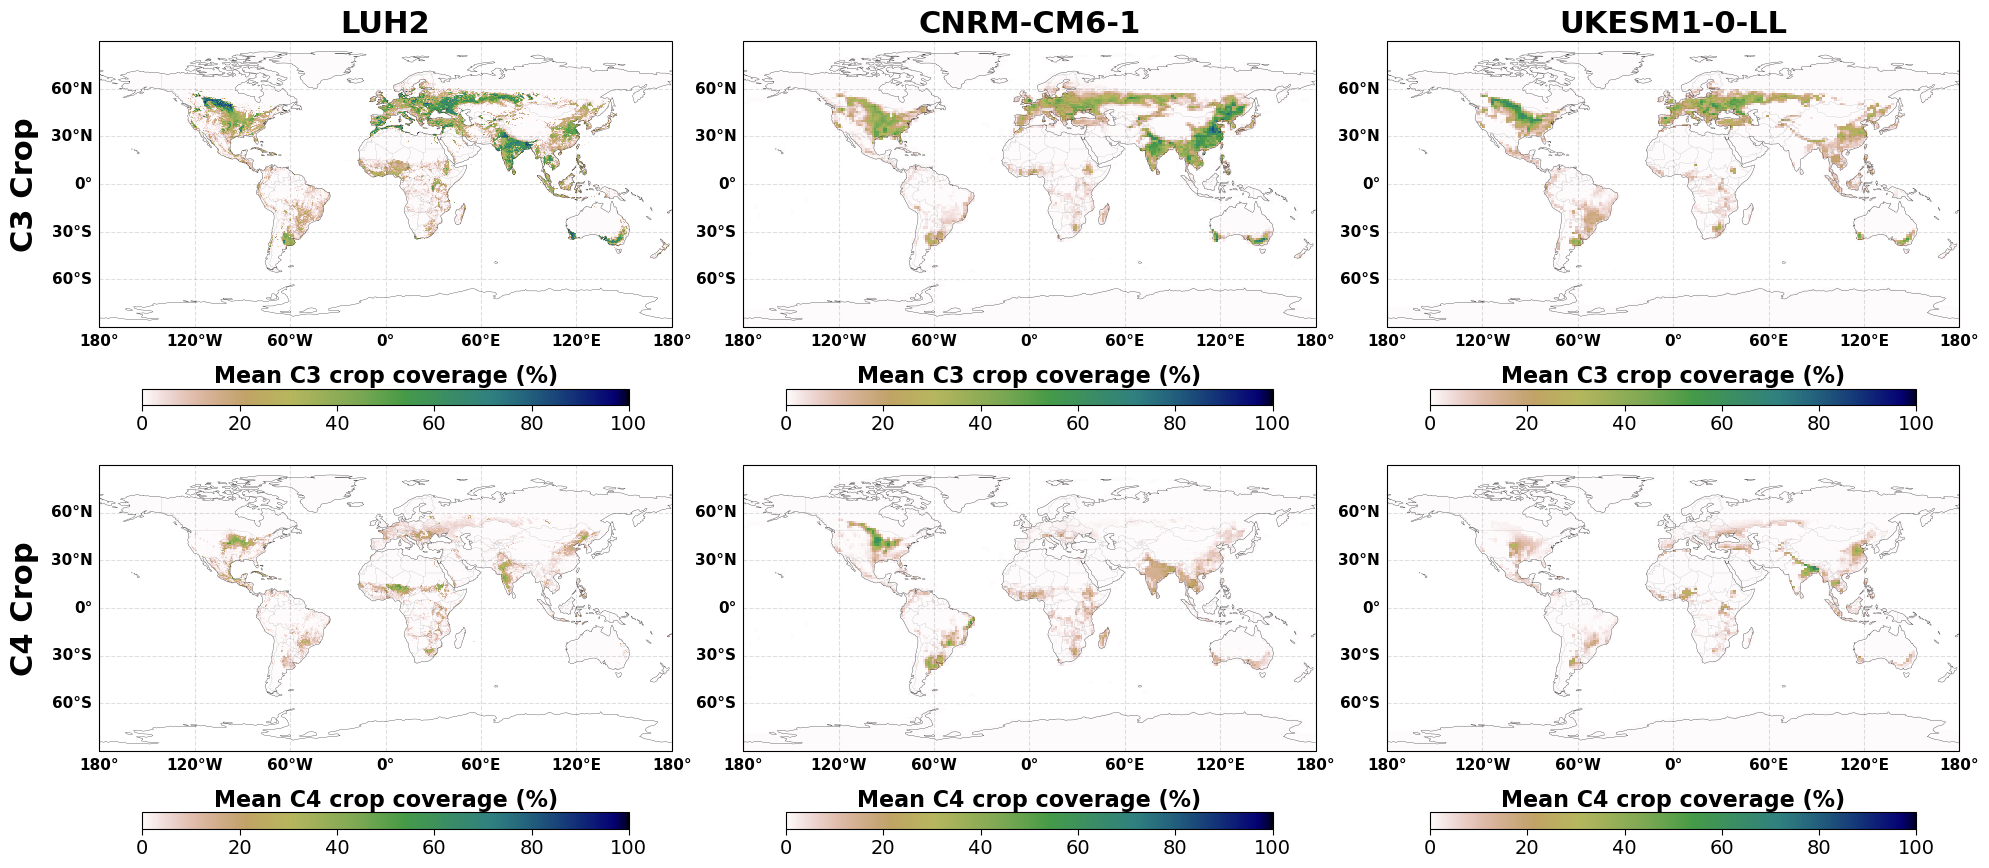

In [174]:
# Make the plot for the Mean crop coverage between 1970 and 2014

# Define your data plots
mean_plot = [luhC3_mean, cncmC3_mean, ukesC3_mean, 
               luhC4_mean, cncmC4_mean, ukesC4_mean]


# Defining the columns, rows, and plot size
fig, axes = plt.subplots(2, 3, figsize=(24, 11), 
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Flattening the 2D array of axes for easy iteration
axes = axes.flatten()

vmin = 0 
vmax = 100  


# Plotting the figures with borders and coastlines
for i, ax in enumerate(axes):
    mean_plot[i].plot(ax=ax, cmap='gist_earth_r', robust = False, 
                        cbar_kwargs={'shrink': 0.85, 'orientation': 'horizontal',
                                     'aspect': 30, 'pad': 0.145}, vmin=vmin, vmax=vmax)
    
    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.05)
    ax.coastlines(linewidth=0.2)
    gl = ax.gridlines(linestyle='--', color='black', 
                      alpha=0.125, draw_labels=True) 
    gl.top_labels = False  
    gl.right_labels = False
    gl.xlabel_style = {'size': 11, 'weight': 'bold'}
    gl.ylabel_style = {'size': 11, 'weight': 'bold'}
    
    # Set the geographical extent to cover the whole globe
    ax.set_extent([-180, 180, -90, 90])  
    
    # Add title based on the model names with increased font weight
    #ax.set_title(plot_names[i], fontsize=18, 
                 #fontweight='bold')  
    
    # Remove x and y axes labels and x and y tick labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add y-axis labels to the first and fourth subplots with padding
axes[0].set_ylabel('C3 Crop', fontsize=22, fontweight='bold', labelpad=40)
axes[3].set_ylabel('C4 Crop', fontsize=22, fontweight='bold', labelpad=40)
axes[0].set_title('LUH2', fontsize=22, fontweight='bold')
axes[1].set_title('CNRM-CM6-1', fontsize=22, fontweight='bold')
axes[2].set_title('UKESM1-0-LL', fontsize=22, fontweight='bold')
axes[4].set_title('')



for i, ax in enumerate(axes):
    cbar = ax.collections[0].colorbar
    
    # Set the label based on the index
    if i <= 2:  # For axes[0] to axes[2]
        cbar.set_label('Mean C3 crop coverage (%)', fontsize=16, fontweight='bold')
    else:  # For axes[3] to axes[5]
        cbar.set_label('Mean C4 crop coverage (%)', fontsize=16, fontweight='bold')
    
    # Common properties for all color bars
    cbar.ax.tick_params(labelsize=14, size=4)
    cbar.ax.xaxis.set_label_position('top')

# Remove color bar from each subplot
#for ax in axes:
    #cbar = ax.collections[0].colorbar
    #cbar.remove()    

# Adjusting the layout to reduce the gap
plt.subplots_adjust(hspace=0.0015, wspace=0.125)

#Save the plot
plt.savefig('mean_c3c4_crop_1970_2014.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()

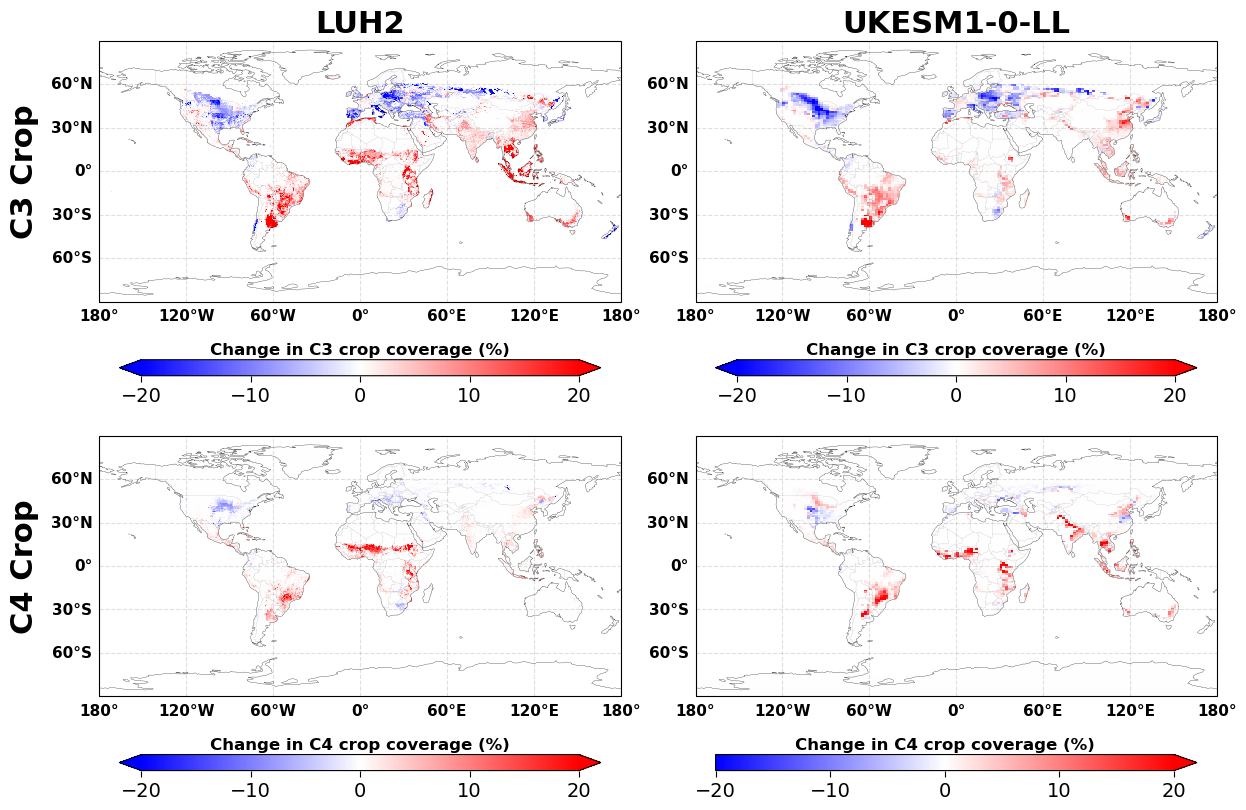

In [201]:
# Make the plot for the change crop coverage between 1970 and 2014

# Define your data plots
change_plot = [luhC3_change, ukesC3_change, 
               luhC4_change, ukesC4_change]


# Defining the columns, rows, and plot size
fig, axes = plt.subplots(2, 2, figsize=(15, 10), 
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Flattening the 2D array of axes for easy iteration
axes = axes.flatten()

vmin = -20 
vmax = 20  


# Plotting the figures with borders and coastlines
for i, ax in enumerate(axes):
    change_plot[i].plot(ax=ax, cmap='bwr', robust = False, 
                        cbar_kwargs={'shrink': 0.85, 'orientation': 'horizontal',
                                     'aspect': 30, 'pad': 0.155}, vmin=vmin, vmax=vmax)
    
    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.05)
    ax.coastlines(linewidth=0.2)
    gl = ax.gridlines(linestyle='--', color='black', 
                      alpha=0.125, draw_labels=True) 
    gl.top_labels = False  
    gl.right_labels = False
    gl.xlabel_style = {'size': 11, 'weight': 'bold'}
    gl.ylabel_style = {'size': 11, 'weight': 'bold'}
    
    # Set the geographical extent to cover the whole globe
    ax.set_extent([-180, 180, -90, 90])  
    
    # Add title based on the model names with increased font weight
    #ax.set_title(plot_names[i], fontsize=18, 
                 #fontweight='bold')  
    
    # Remove x and y axes labels and x and y tick labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add y-axis labels to the first and fourth subplots with padding
axes[0].set_ylabel('C3 Crop', fontsize=22, fontweight='bold', labelpad=40)
axes[2].set_ylabel('C4 Crop', fontsize=22, fontweight='bold', labelpad=40)
axes[0].set_title('LUH2', fontsize=22, fontweight='bold')
axes[1].set_title('UKESM1-0-LL', fontsize=22, fontweight='bold')
#axes[4].set_title('')



for i, ax in enumerate(axes):
    cbar = ax.collections[0].colorbar
    
    # Set the label based on the index
    if i <= 1:  # For axes[0] to axes[1]
        cbar.set_label('Change in C3 crop coverage (%)', fontsize=12, fontweight='bold')
    else:  # For axes[2] to axes[3]
        cbar.set_label('Change in C4 crop coverage (%)', fontsize=12, fontweight='bold')
    
    # Common properties for all color bars
    cbar.ax.tick_params(labelsize=14, size=4)
    cbar.ax.xaxis.set_label_position('top')

# Remove color bar from each subplot
#for ax in axes:
    #cbar = ax.collections[0].colorbar
    #cbar.remove()    

# Adjusting the layout to reduce the gap
plt.subplots_adjust(hspace=0.0525, wspace=0.0525)

#Save the plot
plt.savefig('change_c3c4_crop_1970_2014.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()

# Plot the Latitude Figures

# CNRM-CM6.1

In [32]:
cncmc1 = (cncmc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
cncmc2 = cncmc1.resample(time= 'Y').mean()

#Calculate the mean
cncmc3 = cncmc2.mean(('time'))

#Calculate the mean lat
cncmc3a = cncmc3.mean(('lon'))

# Calculate the change
cncmc4 = cncmc2[-1] - cncmc2[0]

# Calculate the change lat
cncmc4a = cncmc4.mean(('lon'))

# UKESM1

In [26]:
cd UKESM1-0-LL/

/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/UKESM1-0-LL


In [33]:
ukesc1 = (ukesc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
ukesc2 = ukesc1.resample(time= 'Y').mean()

#Calculate the mean
ukesc3 = ukesc2.mean(('time'))

#Calculate the mean lat
ukesc3a = ukesc3.mean(('lon'))

# Calculate the change
ukesc4 = ukesc2[-1] - ukesc2[0]

# Calculate the change lat
ukesc4a = ukesc4.mean(('lon'))

# ACCESS-ESM1-5

In [2]:
pwd

'/Users/jo122/CMIP6'

In [5]:
cd ACCESS-ESM1-5/

/Users/jo122/CMIP6/Data_CMIP6_model_output/CMIP6_models/ACCESS-ESM1-5


In [6]:
# ACCESS

# Load the data
acescf = xr.open_dataset('cropFrac_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc',
                        decode_times = True)
acesaa = xr.open_dataset('areacella_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)
acessf = xr.open_dataset('sftlf_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)

In [7]:
acescf1 = (acescf.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
acescf2 = acescf1.resample(time= 'Y').mean()

#Calculate the mean
acescf3 = acescf2.mean(('time'))

#Calculate the mean lat
acescf3a = acescf3.mean(('lon'))

# Calculate the change
acescf4 = acescf2[-1] - acescf2[0]

# Calculate the change lat
acescf4a = acescf4.mean(('lon'))

In [534]:
#CALCULUTE THE AREA COVERAGE FOR ACCESS-ESM1.5 

#Extract variable
acescf1 = acescf.cropFrac
acesaa1 = acesaa.areacella
acessf1 = acessf.sftlf

#Convert to numpy array and add a repeated time axis to the last the variables
acescf2 = np.asarray(acescf1)
acesaa2 = np.repeat(acesaa1.values[np.newaxis, ...],1980, axis = 0)
acessf2 = np.repeat(acessf1.values[np.newaxis, ...],1980, axis = 0)

#Calculate crop area abundance for access

acescrp = acescf2*acesaa2*acessf2*(10**-4)

In [532]:
#CREATE A FUNCTION TO CONVERT NUMPY ARRAY TO XARRAY DATASET
def convert_to_xarray(a, start_date="1850-01-01", periods=1980, 
                      lat_range=(-90, 90), lon_range=(0, 360), freq="M"):
    """
    Convert a 3D NumPy array to xarray DataArray with specified dimensions and coordinates.
    
    Parameters:
        a (np.ndarray): 3D NumPy array to convert.
        start_date (str): Start date for the time coordinate.
        periods (int): Number of periods for the time coordinate.
        lat_range (tuple): Latitude range as (min, max).
        lon_range (tuple): Longitude range as (min, max).
        freq (str): Frequency of the time coordinate.
    
    Returns:
        xr.DataArray: The resulting xarray DataArray.
    """
    # Create the time coordinate
    time = pd.date_range(start=start_date, periods=periods, freq=freq)
    
    # Create the latitude and longitude coordinates
    lat = np.linspace(lat_range[0], lat_range[1], num=a.shape[1])
    lon = np.linspace(lon_range[0], lon_range[1], num=a.shape[2])
    
    # Create the DataArray
    a1 = xr.DataArray(a, dims=("time", "lat", "lon"),
                      coords={"time": time, "lat": lat, "lon": lon})
    
    return a1

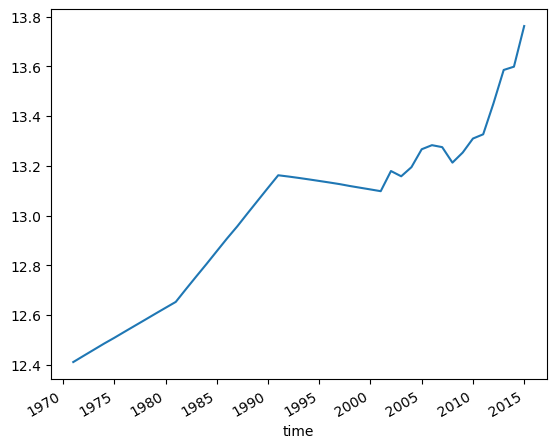

In [636]:
#Convert array
acescrp1 = convert_to_xarray(acescrp)

#Resample them for annual values
acescrp2 = acescrp1.resample(time= 'Y').mean()

#Calculate global annual values
acescrp3 = acescrp2.sum(('lat', 'lon'))

#Take from 1970 to 2017
acescrp4 = acescrp3.sel(time=slice('1970', '2015'))
(acescrp4/10**12).plot()

# CanESM5

In [543]:
# Load the data
caescf = xr.open_dataset('cropFrac_Lmon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc',
                        decode_times = True)
# Load the data
caesaa = xr.open_dataset('areacella_fx_CanESM5_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)
caessf = xr.open_dataset('sftlf_fx_CanESM5_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)

In [557]:
caescf1 = (caescf.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
caescf2 = caescf1.resample(time= 'Y').mean()

#Calculate the mean
caescf3 = caescf2.mean(('time'))

#Calculate the mean lat
caescf3a = caescf3.mean(('lon'))

# Calculate the change
caescf4 = caescf2[-1] - caescf2[0]

# Calculate the change lat
caescf4a = caescf4.mean(('lon'))

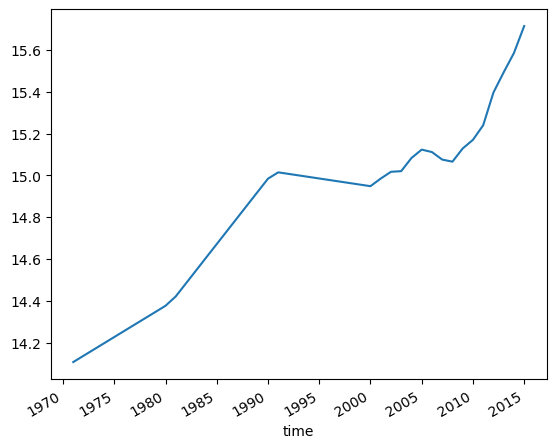

In [635]:
#CALCULUTE THE AREA COVERAGE FOR ACCESS-ESM1.5 

#Extract variable
caescf1 = caescf.cropFrac
caesaa1 = caesaa.areacella
caessf1 = caessf.sftlf

#Convert to numpy array and add a repeated time axis to the last the variables
caescf2 = np.asarray(caescf1)
caesaa2 = np.repeat(caesaa1.values[np.newaxis, ...],1980, axis = 0)
caessf2 = np.repeat(caessf1.values[np.newaxis, ...],1980, axis = 0)

#Calculate crop area abundance for access

caescrp = caescf2*caesaa2*caessf2*(10**-4)

#Convert array
caescrp1 = convert_to_xarray(caescrp)

#Resample them for annual values
caescrp2 = caescrp1.resample(time= 'Y').mean()

#Calculate global annual values
caescrp3 = caescrp2.sum(('lat', 'lon'))

#Take from 1970 to 2017
caescrp4 = caescrp3.sel(time=slice('1970', '2015'))
(caescrp4/10**12).plot()

# CESM2

In [553]:
# Load the data
cesmcf = xr.open_dataset('cropFrac_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc',
                      decode_times = True)
cesmaa = xr.open_dataset('areacella_fx_CESM2_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)
cesmsf = xr.open_dataset('sftlf_fx_CESM2_piControl_r1i1p1f1_gn.nc',
                        decode_times = True)

In [556]:
cesmcf1 = (cesmcf.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
cesmcf2 = cesmcf1.resample(time= 'Y').mean()

#Calculate the mean
cesmcf3 = cesmcf2.mean(('time'))

#Calculate the mean lat
cesmcf3a = cesmcf3.mean(('lon'))

# Calculate the change
cesmcf4 = cesmcf2[-1] - cesmcf2[0]

# Calculate the change lat
cesmcf4a = cesmcf4.mean(('lon'))

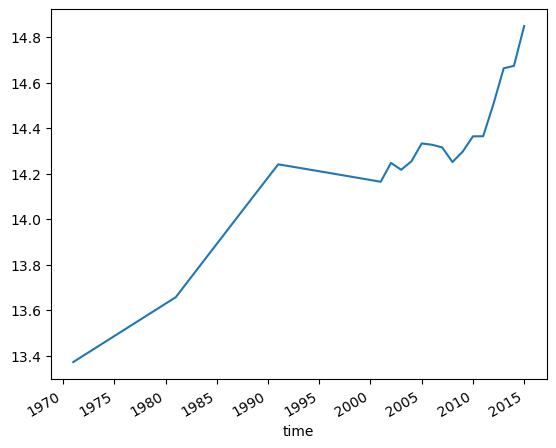

In [634]:
#CALCULUTE THE AREA COVERAGE FOR ACCESS-ESM1.5 

#Extract variable
cesmcf1 = cesmcf.cropFrac
cesmaa1 = cesmaa.areacella
cesmsf1 = cesmsf.sftlf

#Convert to numpy array and add a repeated time axis to the last the variables
cesmcf2 = np.asarray(cesmcf1)
cesmaa2 = np.repeat(cesmaa1.values[np.newaxis, ...],1980, axis = 0)
cesmsf2 = np.repeat(cesmsf1.values[np.newaxis, ...],1980, axis = 0)

#Calculate crop area abundance for access

cesmcrp = cesmcf2*cesmaa2*cesmsf2*(10**-4)

#Convert array
cesmcrp1 = convert_to_xarray(cesmcrp)

#Resample them for annual values
cesmcrp2 = cesmcrp1.resample(time= 'Y').mean()

#Calculate global annual values
cesmcrp3 = cesmcrp2.sum(('lat', 'lon'))

#Take from 1970 to 2017
cesmcrp4 = cesmcrp3.sel(time=slice('1970', '2015'))
(cesmcrp4/10**12).plot()

# CNRM-ESM2

In [336]:
# Load the data
cnesc = xr.open_dataset('cropFrac_Lmon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc',
                        decode_times = True)

In [337]:
cnesc1 = (cnesc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
cnesc2 = cnesc1.resample(time= 'Y').mean()

#Calculate the mean
cnesc3 = cnesc2.mean(('time'))

#Calculate the mean lat
cnesc3a = cnesc3.mean(('lon'))

# Calculate the change
cnesc4 = cnesc2[-1] - cnesc2[0]

# Calculate the change lat
cnesc4a = cnesc4.mean(('lon'))

# MPI-ESM1-2-LR

In [304]:
# Load the data
mpelc = xr.open_mfdataset('cropFrac/*.nc',
                        decode_times = True)

In [312]:
mpelc1 = (mpelc.cropFrac).sel(time=slice('1970', '2015'))

#Resample them for annual values
mpelc2 = mpelc1.resample(time= 'Y').mean()

#Calculate the mean
mpelc3 = mpelc2.mean(('time'))

#Calculate the mean lat
mpelc3a = mpelc3.mean(('lon'))

# Calculate the change
mpelc4 = mpelc2[-1] - mpelc2[0]

# Calculate the change lat mean
mpelc4a = mpelc4.mean(('lon'))

# LUH2

In [36]:
#Calculate the mean

# Slice out 1970 and 2014
luh_c3a = luh_c3.sel(time=slice(1120, 1164))
luh_c4a = luh_c4.sel(time=slice(1120, 1164))

#Calculate the total crop
luhc = luh_c3a + luh_c4a

#Calculate the mean
luhc1 = luhc.mean(('time'))


#Calculate the mean lat
luhc1a = luhc1.mean(('lon'))


# Calculate the change
luhc2 = luhc[-1] - luhc[0]

#Calculate the change lat mean
luhc2a = luhc2.mean(('lon'))

In [606]:
luh = xr.open_dataset(/path_to/luh_models_data/Processed_files/gridcell_area_reg.nc', 
                      decode_times = True)

In [620]:
#CREATE A FUNCTION TO CONVERT NUMPY ARRAY TO XARRAY DATASET
def luh_to_xarray(a, start_date="1970", periods=45, 
                      lat_range=(-90, 90), lon_range=(0, 360), freq="Y"):
    """
    Convert a 3D NumPy array to xarray DataArray with specified dimensions and coordinates.
    
    Parameters:
        a (np.ndarray): 3D NumPy array to convert.
        start_date (str): Start date for the time coordinate.
        periods (int): Number of periods for the time coordinate.
        lat_range (tuple): Latitude range as (min, max).
        lon_range (tuple): Longitude range as (min, max).
        freq (str): Frequency of the time coordinate.
    
    Returns:
        xr.DataArray: The resulting xarray DataArray.
    """
    # Create the time coordinate
    time = pd.date_range(start=start_date, periods=periods, freq=freq)
    
    # Create the latitude and longitude coordinates
    lat = np.linspace(lat_range[0], lat_range[1], num=a.shape[1])
    lon = np.linspace(lon_range[0], lon_range[1], num=a.shape[2])
    
    # Create the DataArray
    a1 = xr.DataArray(a, dims=("time", "lat", "lon"),
                      coords={"time": time, "lat": lat, "lon": lon})
    
    return a1

In [623]:
#Convert array
luhcrp1 = luh_to_xarray(luhcrp)

# Make the Composite Figure for Lat Mean and Change

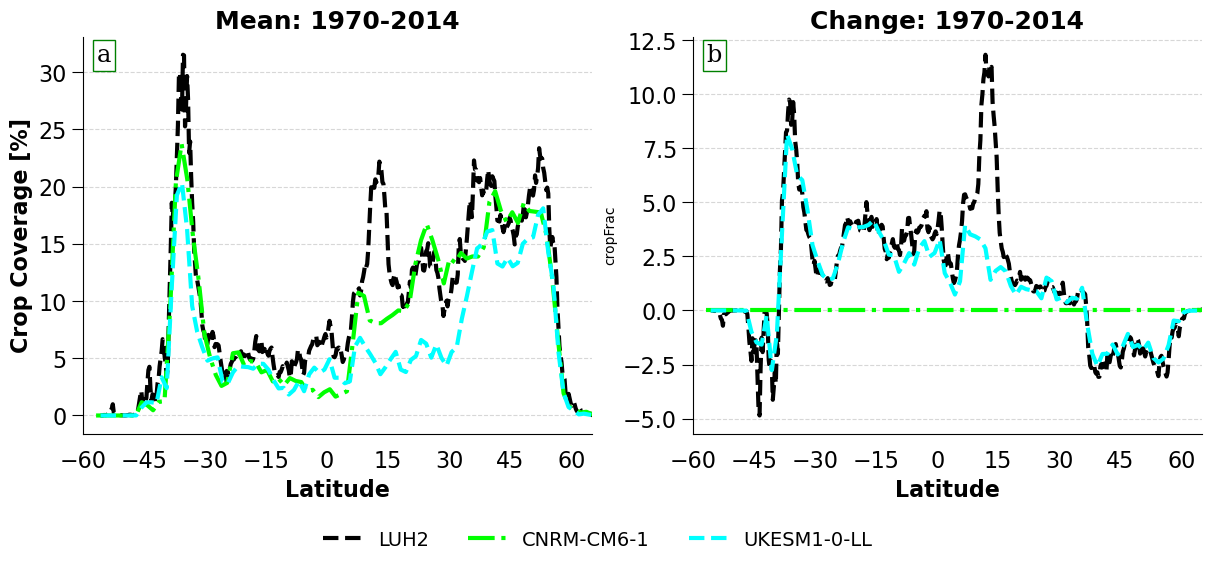

In [54]:
xmin = -60
xmax = 65

fig, axs = plt.subplot_mosaic([['a', 'b']],
                               figsize=(12, 5), layout="constrained")
(luhc1a*100).plot(ax=axs['a'],ls = '--', lw = 3, c = 'black', label = 'LUH2')
cncmc3a.plot(ax=axs['a'],ls = '-.', lw = 3, c = 'lime', label = 'CNRM-CM6-1')
ukesc3a.plot(ax=axs['a'],ls = '--', lw = 3, c = 'aqua', label = 'UKESM1-0-LL')

axs['a'].xaxis.grid(True, linestyle='--', alpha=0.5)
axs['a'].yaxis.grid(True, linestyle='--', alpha=0.5)
axs['a'].xaxis.grid(False)
#axs['a'].set_visible(False)
axs['a'].set_title('Mean: 1970-2014', weight = 'bold',  fontsize = 18)
axs['a'].set_ylabel('Crop Coverage [%]', fontsize = 16, weight = 'bold')
axs['a'].set_xlabel('Latitude', fontsize = 16, weight = 'bold')
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].set_xlim([xmin, xmax])
axs['a'].tick_params(axis = 'both', which = 'both', bottom = False, 
                         top = False, labelsize=16, size=8)
axs['a'].xaxis.set_major_locator(MaxNLocator(nbins=10))

# Plot on the 'b) axis

(luhc2a*100).plot(ax=axs['b'],ls = '--', lw = 3, c = 'black', label = 'LUH2')
cncmc4a.plot(ax=axs['b'],ls = '-.', lw = 3, c = 'lime', label = 'CNRM-CM6-1')
ukesc4a.plot(ax=axs['b'],ls = '--', lw = 3, c = 'aqua', label = 'UKESM1-0-LL')

axs['b'].xaxis.grid(True, linestyle='--', alpha=0.5)
axs['b'].yaxis.grid(True, linestyle='--', alpha=0.5)
axs['b'].xaxis.grid(False)
#axs['b'].set_visible(False)
axs['b'].set_title('Change: 1970-2014', fontsize = 18, weight = 'bold')
#axs['b'].set_ylabel('C3 GPP [PgCy$^{-1}$]', fontsize = 12, weight = 'bold')
axs['b'].set_xlabel('Latitude', fontsize = 16, weight = 'bold')
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].set_xlim([xmin, xmax])
axs['b'].tick_params(axis = 'both', which = 'both', bottom = False, 
                         top = False, labelsize=16, size=8)
#axs['b'].set_xticks([])
axs['b'].xaxis.set_major_locator(MaxNLocator(nbins=10))
      
    
# MAKE THE LEGEND
# Combine handles and labels from the relevant axes
handles, labels = [], []
for ax_key in ['a', 'b']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'b'
fig.legend(handles, labels, fontsize=14, loc='upper left', ncol=4,
           bbox_to_anchor=(0.25, 0.3, 0.5, -0.315), frameon=False)

#Add the text labels
import matplotlib.transforms as mtransforms  # Add this line if transforms are needed

# Assuming axs is a dictionary mapping labels to axes objects
for label, ax in axs.items():
    # Label physical distance in and down
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='xx-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='green', pad=3.0))    

    # Save the plot
plt.savefig('Mean_change_lat_xlim_2models.png', dpi=500, 
            bbox_inches='tight', pad_inches=0.1)


plt.show()